In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/Absenteeism_at_work.csv',delimiter=';')
train.at[51, 'ID']=28
train['Reason for absence'].replace({0:20},inplace=True)
train.rename(columns={"Work load Average/day":"work load" },inplace=True)
df=train


In [ ]:
train.duplicated().sum()
train.drop_duplicates(inplace=True)
train.shape

(706, 21)

In [ ]:
train[train['Month of absence']==0]

ID  Reason for absence  ...  Body mass index  Absenteeism time in hours
737   4                  20  ...               34                          0
738   8                  20  ...               35                          0
739  35                  20  ...               25                          0

[3 rows x 21 columns]

In [ ]:
tc=[]
for cost in list(train['Transportation expense'].values):
    if cost<=200:
        tc.append('Cheap')
    elif 200<cost<=300:
        tc.append('Expensive')
    else:
        tc.append('Very expensive')
train['Transportation_cost']=tc
dist=[]
for distance in list(train['Distance from Residence to Work'].values):
    if distance<=15:
        dist.append('Close')
    elif 15<distance<=35:
        dist.append('Far')
    else:
        dist.append('Very far')
train['Distance_category']=dist
ag=[]
for distance in list(train['Age'].values):
    if distance<=37:
        ag.append('Young')
    elif 37<distance<=47:
        ag.append('Middle-aged')
    else:
        ag.append('Old')
train['Age_cat']=ag
chil=[]
for distance in list(train['Son'].values):
    if distance<=3:
        chil.append('Less than equal to 3')
    else:
        chil.append('More than 3')
    
train['chil_cat']=chil
Id_type=[]
for col in list(train['Reason for absence'].values):
    if col<=21:
        Id_type.append('ICD')
    else:
        Id_type.append('Non ICD')
        
train['ICD category']=Id_type
Id_type=[]
for col in list(train['Reason for absence'].values):
    if col==26:
        Id_type.append('Unjustified absence')
    else:
        Id_type.append('Justified')
        
train['reason']=Id_type

In [ ]:
train['Reason for absence'].replace({1:'Certain infectious and parasitic diseases',
2:'Neoplasms',
3:"Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism",
4:" Endocrine, nutritional and metabolic diseases",
5: 'Mental and behavioral disorders',
6: 'Diseases of the nervous system',
7: 'Diseases of the eye and adnexa',
8:'Diseases of the ear and mastoid process',
9: 'Diseases of the circulatory system',
10: 'Diseases of the respiratory system',
11: 'Diseases of the digestive system',
12: 'Diseases of the skin and subcutaneous tissue',
13: 'Diseases of the musculoskeletal system and connective tissue',
14: 'Diseases of the genitourinary system',
15: 'Pregnancy, childbirth and the puerperium',
16: 'Certain conditions originating in the perinatal period',
17: 'Congenital malformations, deformations and chromosomal abnormalities',
18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
19: 'Injury, poisoning and certain other consequences of external causes',
20: 'External causes of morbidity and mortality',
21:'Factors influencing health status and contact with health services',22:'patient follow-up' , 23:'medical consultation', 24:'blood donation',
25:'laboratory examination', 26:'unjustified absence',27:'physiotherapy', 28:'dental consultation'},inplace=True)
train['Month of absence'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
train.at[737, 'Month of absence']='Sep'
train.at[738, 'Month of absence']='Mar'
train.at[739, 'Month of absence']='Apr'

In [ ]:
train['Seasons'].replace({1:'Summer', 2:'Autumn' ,3:'Winter', 4:'Spring'},inplace=True)
train['Day of the week'].replace({2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'},inplace=True)

In [ ]:
train['Education'].replace({1:'high school', 2:'graduate',3:'postgraduate',4: 'master and doctor'},inplace=True)

In [ ]:
train['Social drinker'].replace({1:'Social drinker',0:'Not Social Drinker'},inplace=True)
train['Social smoker'].replace({1:'Social smoker',0:'Not Social Smoker'},inplace=True)
train['Drinker-Smoker']=train['Social smoker']+'-'+train['Social drinker']

In [ ]:
train['Service time'].describe()

count    706.000000
mean      12.495751
std        4.370190
min        1.000000
25%        9.000000
50%       13.000000
75%       16.000000
max       29.000000
Name: Service time, dtype: float64

In [ ]:
tc=[]
for cost in list(train['Transportation expense'].values):
    if cost<=200:
        tc.append('Cheap')
    elif 200<cost<=300:
        tc.append('Expensive')
    else:
        tc.append('Very expensive')
train['Transportation_cost']=tc
dist=[]
for distance in list(train['Distance from Residence to Work'].values):
    if distance<=15:
        dist.append('Close')
    elif 15<distance<=35:
        dist.append('Far')
    else:
        dist.append('Very far')
train['Distance_category']=dist
ag=[]
for distance in list(train['Age'].values):
    if distance<=37:
        ag.append('Young')
    elif 37<distance<=47:
        ag.append('Middle-aged')
    else:
        ag.append('Old')
train['Age_cat']=ag
chil=[]
for distance in list(train['Son'].values):
    if distance<=3:
        chil.append('Less than equal to 3')
    else:
        chil.append('More than 3')
    
train['chil_cat']=chil
Id_type=[]
for col in list(train['Reason for absence'].values):
    if col<=21:
        Id_type.append('ICD')
    else:
        Id_type.append('Non ICD')
        
train['ICD category']=Id_type
Id_type=[]
for col in list(train['Reason for absence'].values):
    if col==26:
        Id_type.append('Unjustified absence')
    else:
        Id_type.append('Justified')
        
train['reason']=Id_type

TypeError: ignored

In [ ]:
train.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Transportation_cost', 'Distance_category',
       'Age_cat', 'chil_cat', 'ICD category', 'Drinker-Smoker'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


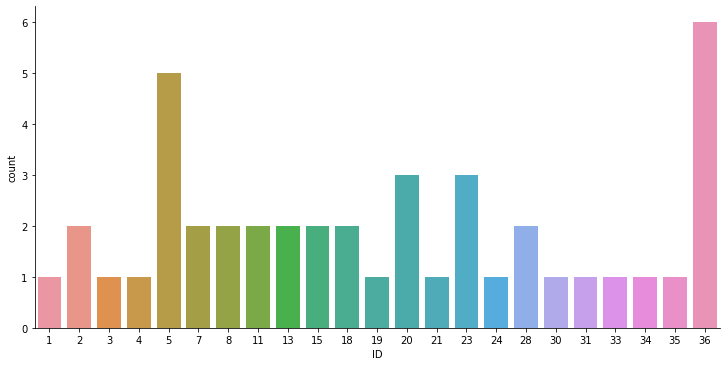

In [ ]:
d=train[train['Absenteeism time in hours']==0]
sns.factorplot(data=d, x='ID', kind= 'count',size=5,aspect=2)

In [ ]:
for i in train.columns:
  print(i)
  print(train[i].nunique())

ID
36
Reason for absence
28
Month of absence
12
Day of the week
5
Seasons
4
Transportation expense
24
Distance from Residence to Work
25
Service time
18
Age
22
Work load Average/day 
38
Hit target
13
Disciplinary failure
2
Education
4
Son
5
Social drinker
2
Social smoker
2
Pet
6
Weight
26
Height
14
Body mass index
17
Absenteeism time in hours
19
Drinker-Smoker
4
BMI_CAT
2


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


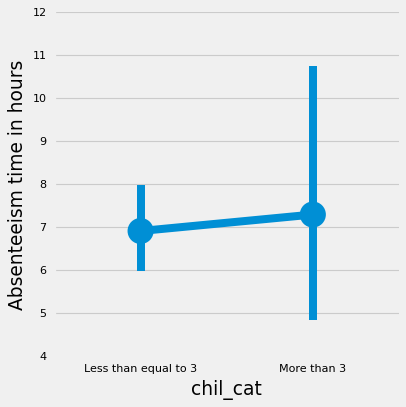

In [ ]:
plt.style.use('fivethirtyeight')
sns.factorplot(x='chil_cat',y='Absenteeism time in hours',data=train)


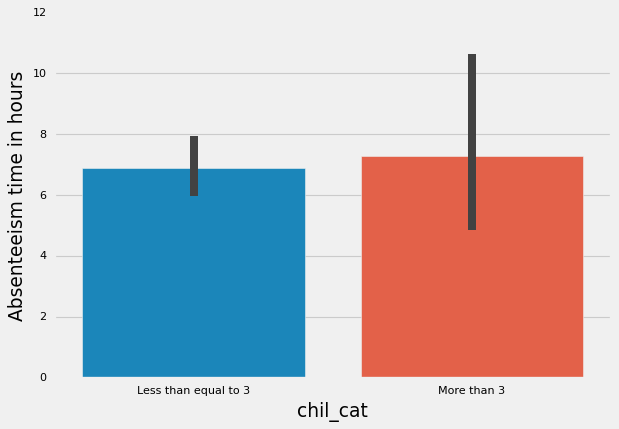

In [ ]:
sns.barplot(x='chil_cat',y='Absenteeism time in hours',data=train)


In [ ]:
train['Body mass index'].describe()

count    740.000000
mean      26.677027
std        4.285452
min       19.000000
25%       24.000000
50%       25.000000
75%       31.000000
max       38.000000
Name: Body mass index, dtype: float64

In [ ]:
dist=[]
for distance in list(train['Body mass index'].values):
    if distance<=25:
        dist.append('BMI<26')
    else:
        dist.append('BMI>=26')
train['BMI_CAT']=dist

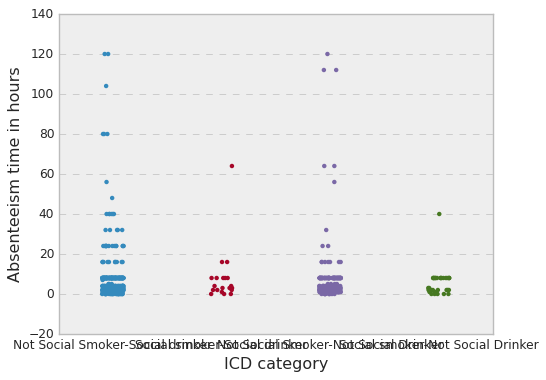

In [ ]:
plt.style.use('bmh')
plt.figure(figsize=(7,5))
sns.stripplot(x="ICD category", y="Absenteeism time in hours", data=train,size=4)



In [ ]:
plt.style.use('bmh')

sns.stripplot(train, x="ICD_category")


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

In [ ]:
plt.style.use('fivethirtyeight')
sns.set_style("dark")

plt.figure(figsize=(7,5))
sns.countplot(y='ID',data=train,color='darkblue',palette=None)
plt.ylabel('Absenteeism time (in hours)')
plt.xlabel('Number of employees')
plt.title('Count of employees per Absenteeism hour')
plt.savefig('1st.png',dpi=300)


In [ ]:
train['Age'].describe()

count    740.000000
mean      36.450000
std        6.478772
min       27.000000
25%       31.000000
50%       37.000000
75%       40.000000
max       58.000000
Name: Age, dtype: float64

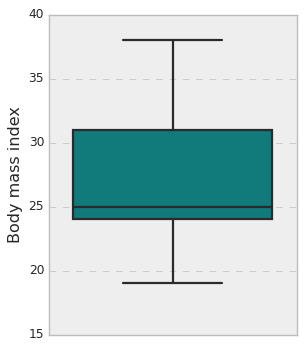

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
plt.style.use('bmh')
plt.figure(figsize=(4,5))
ax = sns.boxplot(y="Body mass index", data=train,color='darkcyan')


In [ ]:
id['Absenteeism time in hours'].describe()

count     36.000000
mean     142.333333
std      148.549559
min        0.000000
25%       24.000000
50%       78.000000
75%      253.250000
max      482.000000
Name: Absenteeism time in hours, dtype: float64

In [ ]:
id=train.groupby('ID').sum()
a=list(id['Absenteeism time in hours'].values)


In [ ]:
dist=[]

for distance in a:
    if distance<=100:
        dist.append('Less than 100 hours')
    elif 100<distance<350:
        dist.append('100 to 350 hours')
    else:
        dist.append('Greater than 350 hours')
id['abs_category']=dist
id['abs_category']

ID
1           100 to 350 hours
2        Less than 100 hours
3     Greater than 350 hours
4        Less than 100 hours
5           100 to 350 hours
6        Less than 100 hours
7        Less than 100 hours
8        Less than 100 hours
9           100 to 350 hours
10          100 to 350 hours
11    Greater than 350 hours
12       Less than 100 hours
13          100 to 350 hours
14    Greater than 350 hours
15          100 to 350 hours
16       Less than 100 hours
17          100 to 350 hours
18          100 to 350 hours
19       Less than 100 hours
20          100 to 350 hours
21       Less than 100 hours
22          100 to 350 hours
23       Less than 100 hours
24          100 to 350 hours
25       Less than 100 hours
26       Less than 100 hours
27       Less than 100 hours
28          100 to 350 hours
29       Less than 100 hours
30       Less than 100 hours
31       Less than 100 hours
32       Less than 100 hours
33       Less than 100 hours
34          100 to 350 hours
35       Le

Text(0.5, 1.0, 'Total Absenteeism hours per id')

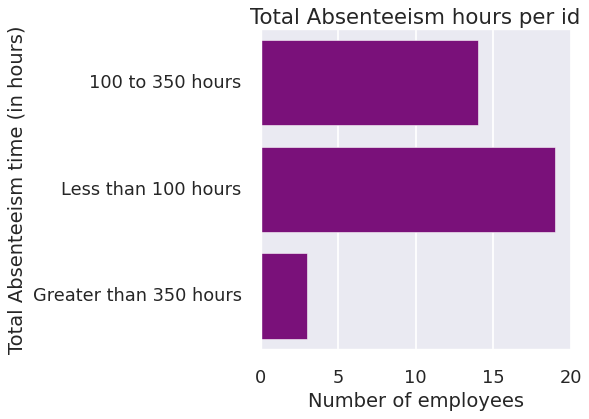

In [ ]:
plt.style.use('seaborn-poster')

plt.figure(figsize=(5,5))
sns.countplot(y='abs_category',data=id,color='darkmagenta',palette=None)
plt.ylabel('Total Absenteeism time (in hours)')
plt.xlabel('Number of employees')
plt.title('Total Absenteeism hours per id')


In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
train['Absenteeism time in hours'].nunique()

19

In [ ]:
train['Reason for absence'].unique()

array([26, 20, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

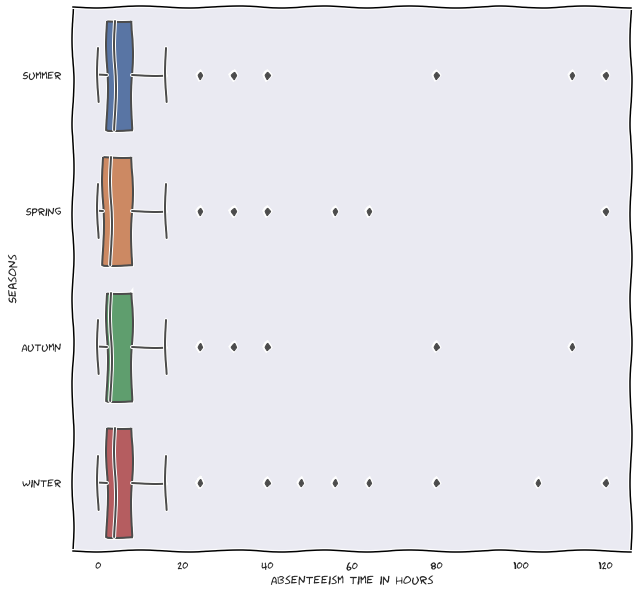

In [ ]:
sns.set(rc={'figure.figsize':(45,30)})
plt.xkcd()
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="Absenteeism time in hours", y="Seasons", data=train)


In [ ]:
ax = sns.countplot(x="Absenteeism time in hours", hue="Education", data=train)

In [ ]:
#groupby the data by delivery type
id= train.groupby("ID").sum()
data

In [ ]:
 sns.FacetGrid(train,hue='Seasons',height=5,aspect=2).map(sns.distplot,"Absenteeism time in hours").add_legend()

In [ ]:
sns.FacetGrid(train,hue='Social drinker',height=5).map(sns.countplot,"Absenteeism time in hours").add_legend()

Non social drinkers significantly oust social drinkers in absenteeism in only two instances that is also in lower absenteeism hours.For other instances,social drinkers rule in absenteeism.Although the overall absenteeism hours decreases irrespective of social drinking ,absenteeism hours can be seen to be impacted by whether a person is a social drinker or not.


In [ ]:
sns.FacetGrid(train,hue='Social smoker',height=5).map(sns.countplot,"Absenteeism time in hours").add_legend()

In [ ]:
sns.FacetGrid(train,hue='Seasons',height=7,aspect=2).map(sns.countplot,"Absenteeism time in hours").add_legend()

In [ ]:
edt=[]
for edu in list(df['Education'].values):
    if edu==1:
        edt.append('High school')
    elif edu==2:
        edt.append('Graduate')
    elif edu==3:
        edt.append('Postgraduate')
    else:
        edt.append('Master & Doctor')
df['Edu_category']=edt

sum15=df[(df['Education']==1)]['Absenteeism time in hours'].sum()
sum16=df[(df['Education']==2)]['Absenteeism time in hours'].sum()
sum17=df[(df['Education']==3)]['Absenteeism time in hours'].sum()
sum18=df[(df['Education']==4)]['Absenteeism time in hours'].sum()

plt.style.use('default')
sns.set_style('whitegrid')
x=['High school','Graduate','Postgraduate','Master & Doctor']
y=[sum15,sum16,sum17,sum18]
plt.figure(figsize=(7,5))
sns.barplot(x=x, y=y)
plt.xlabel('Education')
plt.ylabel('Absenteeism time (in hours)')
plt.title('Average Abseentism time by education')

In [ ]:

sns.set(rc={'figure.figsize':(100,80)})

plt.figure(figsize=(100,10))
sns.FacetGrid(train,hue='Education',height=5).map(sns.displot,"Absenteeism time in hours").add_legend()

In [ ]:
g = sns.FacetGrid(train, hue="Social drinker", col="Absenteeism time in hours")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.set_axis_labels("absenteeism time", "Count")
g.add_legend()

In [ ]:

sns.set(rc={'figure.figsize':(45,30)})

plt.figure(figsize=(10,10))
sns.scatterplot(y=train["Absenteeism time in hours"], x=train["Seasons"])

In [ ]:
g=sns.histplot(data=train, x="Absenteeism time in hours",hue="Seasons")

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(100,80)})

plt.figure(figsize=(100,10))
plt.figure(figsize=(100,10))
g = sns.FacetGrid(train, col="Education", height=5, aspect=1)
g.map(sns.countplot, "Absenteeism time in hours")


In [ ]:
train['Service time'].unique()

array([13, 18, 14,  3, 11, 16,  4,  6, 12,  7, 10,  9, 17, 29,  8,  1, 15,
       24])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


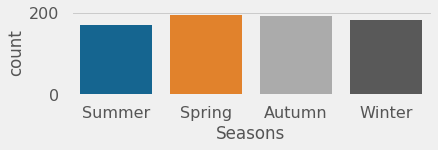

In [ ]:
df=train
plt.style.use('tableau-colorblind10')

sns.factorplot(data=df, x='Seasons', kind= 'count',size=2,aspect=3)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


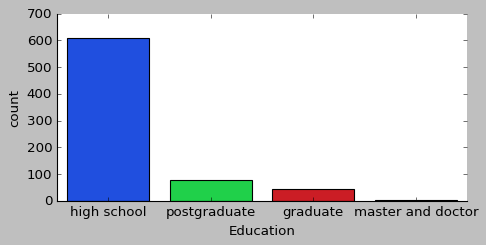

In [ ]:
sns.factorplot(data=df, x='Education', kind= 'count',size=3,aspect=2)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


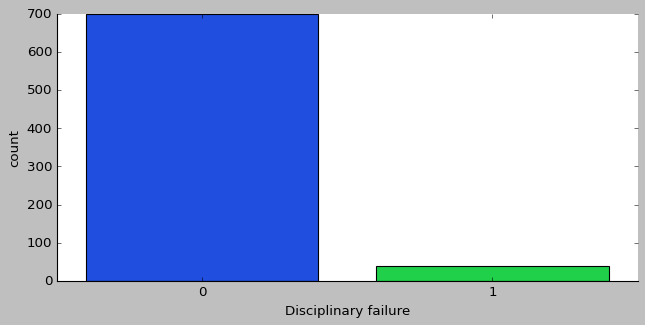

In [ ]:
sns.factorplot(data=df, x='Disciplinary failure', kind='count',size=4,aspect=2)


In [ ]:
plt.style.use('fivethirtyeight')
sns.factorplot(data=df, y='Distance-Transport expense', kind='count',size=4,aspect=2)


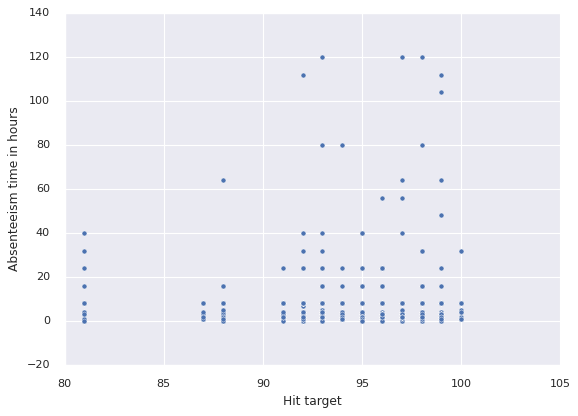

In [ ]:
plt.style.use('seaborn-notebook')
sns.scatterplot(data=train, x='Hit target',y="Absenteeism time in hours",sizes=4)
plt.show()

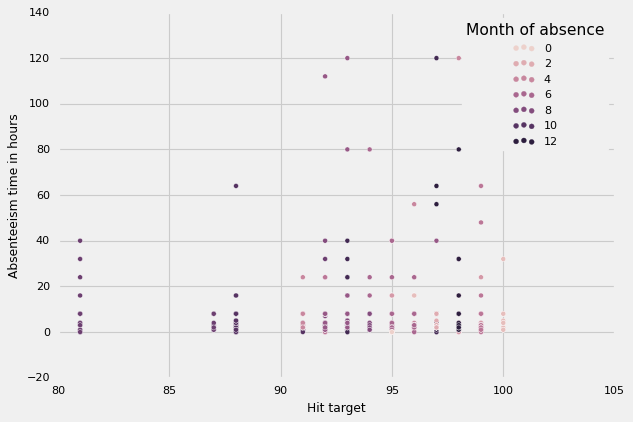

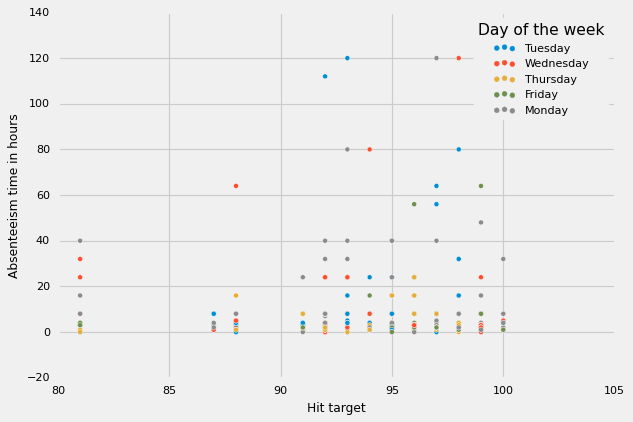

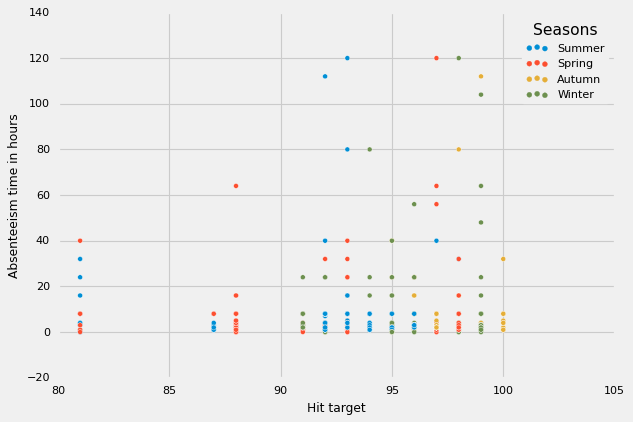

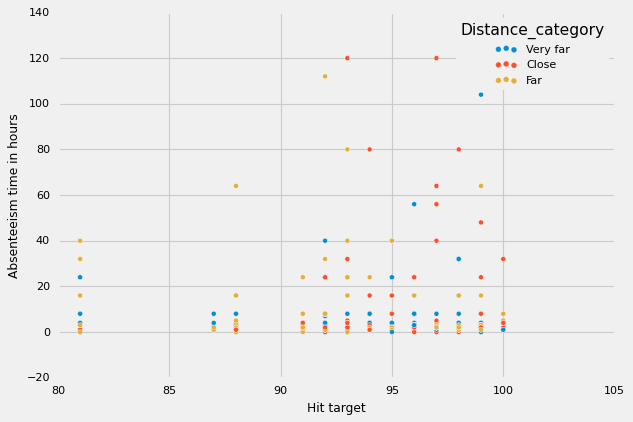

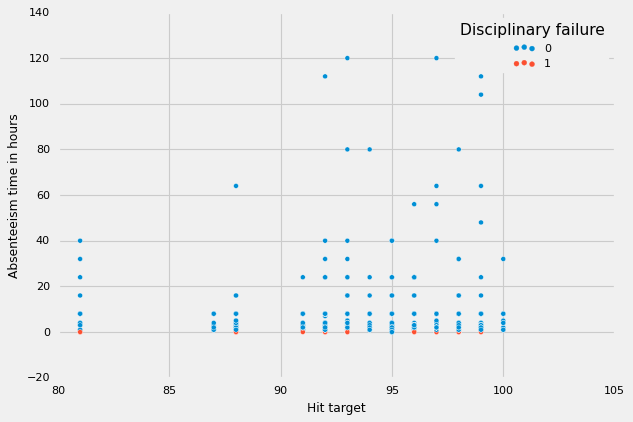

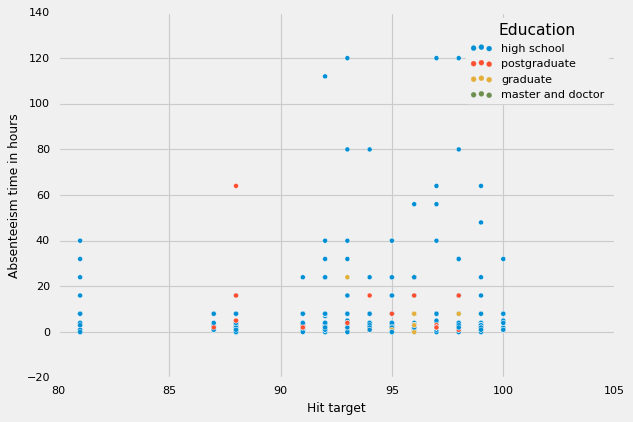

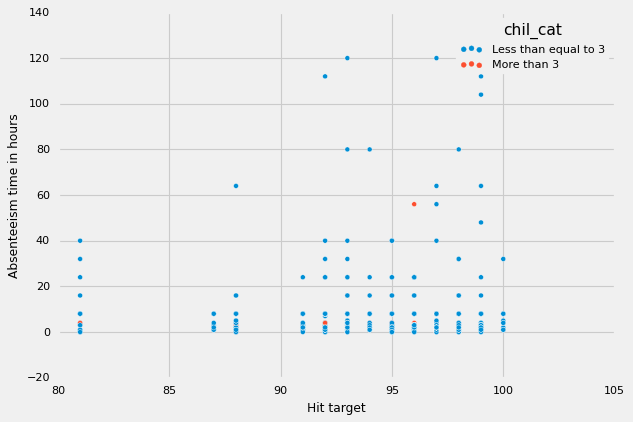

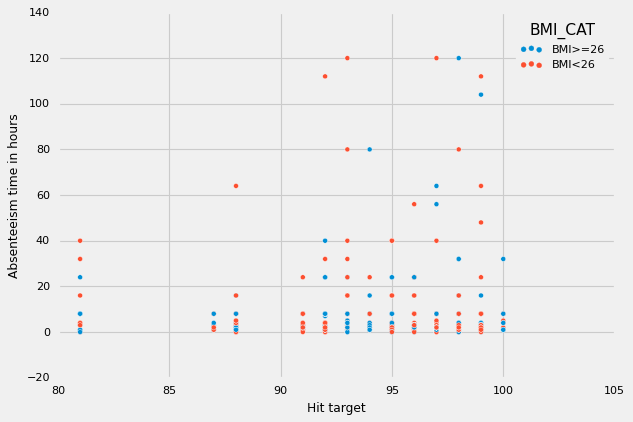

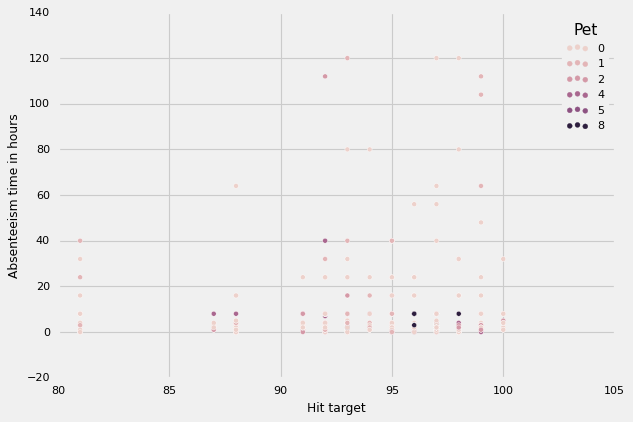

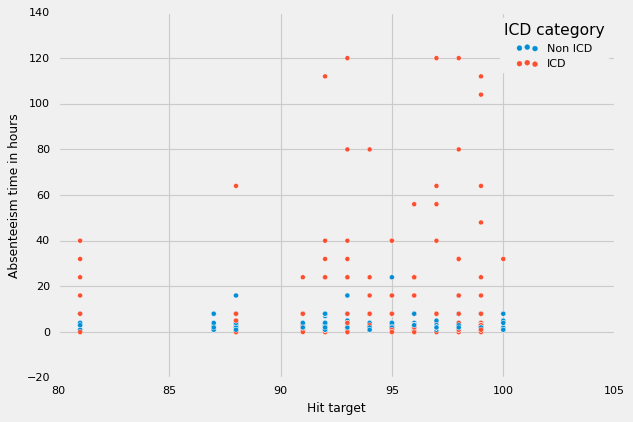

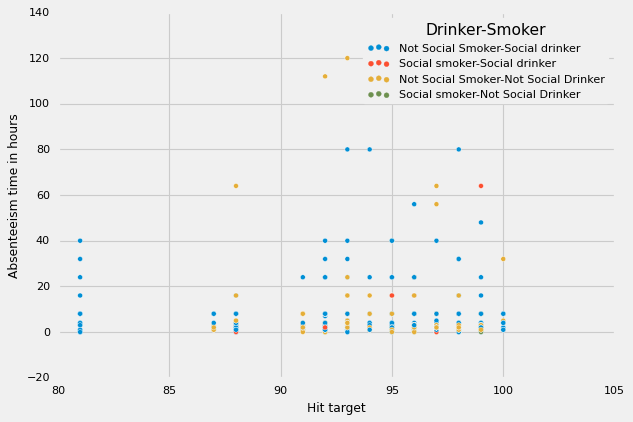

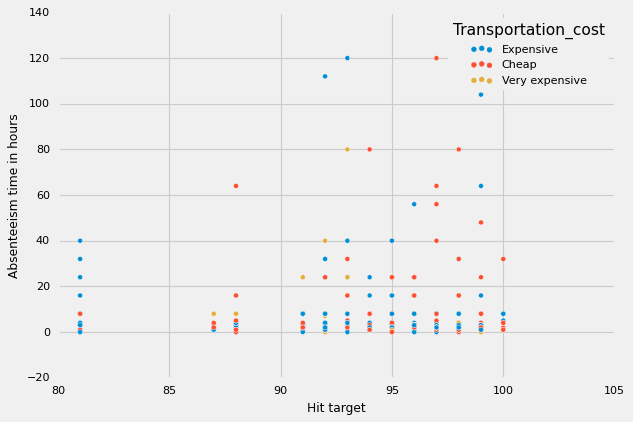

In [ ]:
l=['Month of absence', 'Day of the week',
       'Seasons','Distance_category',
       'Disciplinary failure', 'Education', 'chil_cat','BMI_CAT', 'Pet', 'ICD category', 'Drinker-Smoker',
       'Transportation_cost']
for i in l:
  plt.style.use('seaborn-notebook')
  sns.scatterplot(data=train, x='Hit target',y="Absenteeism time in hours",hue=i,sizes=3)
  plt.show()



In [ ]:
train.groupby('Drinker-Smoker').sum()

ID  ...  Absenteeism time in hours
Drinker-Smoker                              ...                           
Not Social Smoker-Not Social Drinker  7051  ...                       1707
Not Social Smoker-Social drinker      5331  ...                       3066
Social smoker-Not Social Drinker       536  ...                        191
Social smoker-Social drinker           414  ...                        160

[4 rows x 15 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


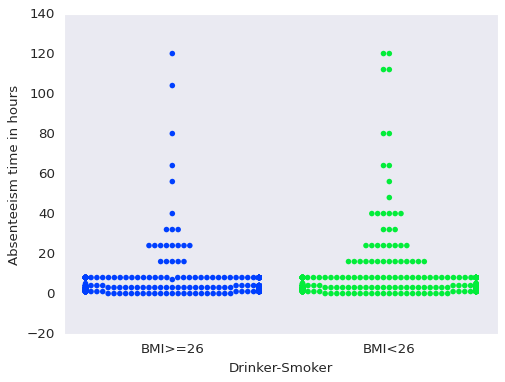

In [ ]:

plt.style.use('seaborn-bright')
sns.set_style('dark')
plt.figure(figsize=(7,5))
sns.swarmplot(x='Drinker-Smoker',y='Absenteeism time in hours',data=train)

In [ ]:
tt['Absenteeism time in hours'].round(2) 

Age
27     3.86
28     5.56
29     4.43
30     5.50
31     9.86
32     3.69
33    10.55
34    16.41
36     6.92
37     5.96
38     4.27
39     3.75
40     6.53
41     8.09
43     7.79
46     8.00
47     3.04
48     4.17
49     3.20
50     8.84
53     0.00
58    32.75
Name: Absenteeism time in hours, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 8.844444444444461, 'Average Absenteeism time (in hours)')

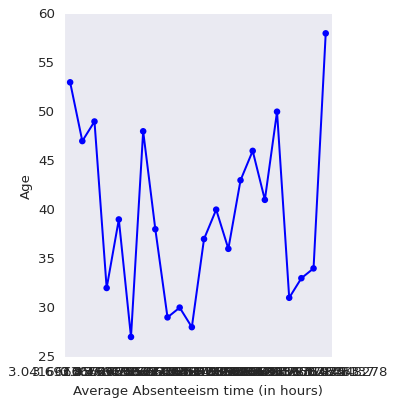

In [ ]:
tt=train.groupby('Age',as_index=True).mean()

tt['Age'] = tt.index

plt.style.use('classic')
sns.set_style('dark')
ax = sns.factorplot(x='Absenteeism time in hours', y='Age', data=tt)
plt.xlabel('Average Absenteeism time (in hours)')

In [ ]:
train['Distance-Transport expense']=train['Distance_category']+'-'+train['Transportation_cost']

In [ ]:
tt=train.groupby('Education',as_index=True).sum()

tt['Education'] = tt.index

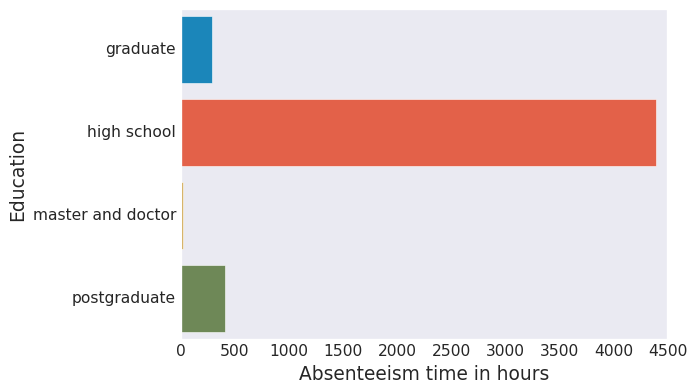

In [ ]:

plt.style.use('fivethirtyeight')
sns.set_style('dark')
plt.figure(figsize=(7,5))
sns.barplot(y=tt["Education"], x=tt["Absenteeism time in hours"])
plt.xlabel('Absenteeism time in hours')
plt.xticks(rotation=0);

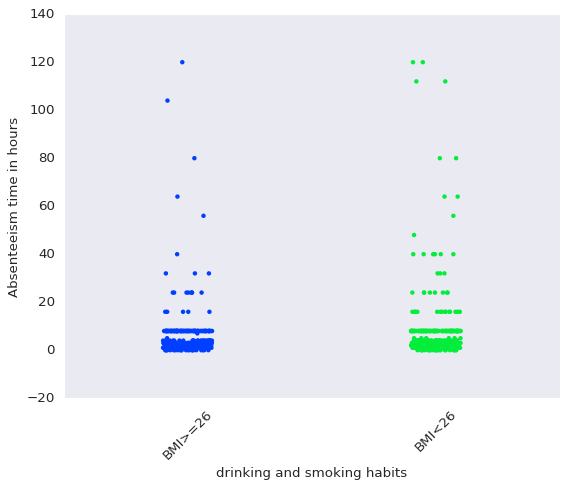

In [ ]:
sns.stripplot(x="Drinker-Smoker", y="Absenteeism time in hours", data=train,size=4)
plt.xlabel('drinking and smoking habits')
plt.xticks(rotation=45);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


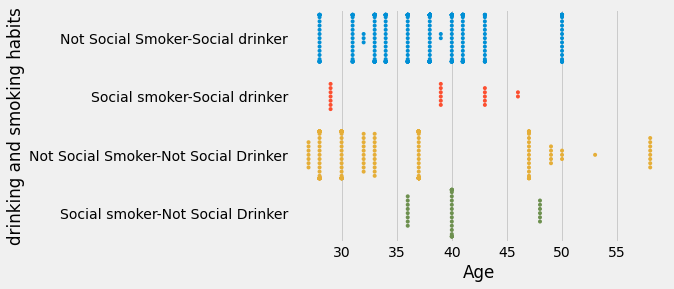

In [ ]:
sns.swarmplot(y="Drinker-Smoker", x="Age", data=train,size=4)
plt.ylabel('drinking and smoking habits')
plt.xticks(rotation=0);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


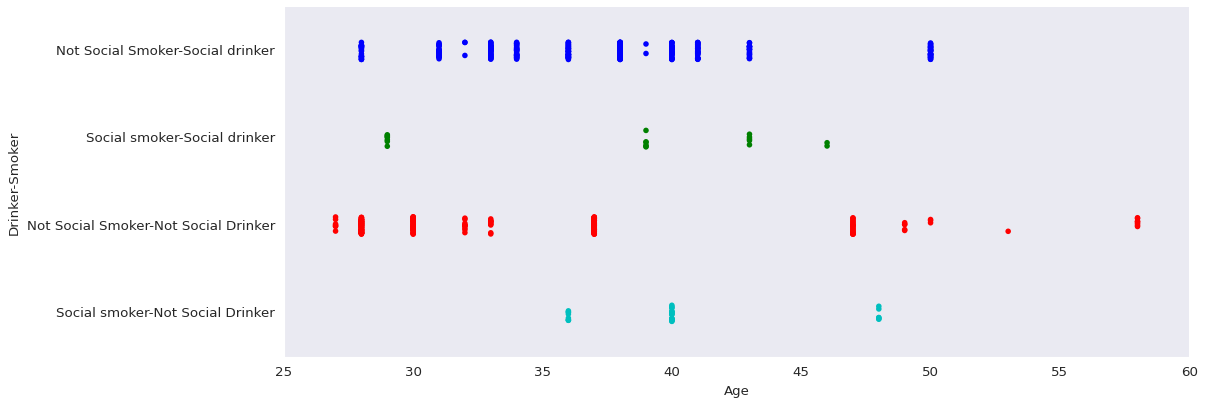

In [ ]:












































plt.style.use('classic')
sns.set_style('dark')

sns.catplot(y="Drinker-Smoker", x="Age", data=train,size=5,aspect=3)
plt.xlabel('Age')
plt.xticks(rotation=0);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'Number of Children')

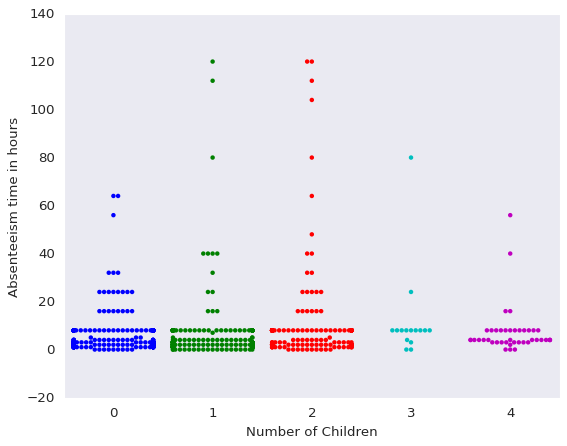

In [ ]:
sns.swarmplot(x="Son", y="Absenteeism time in hours", data=train,size=4)
plt.xlabel('Number of Children')

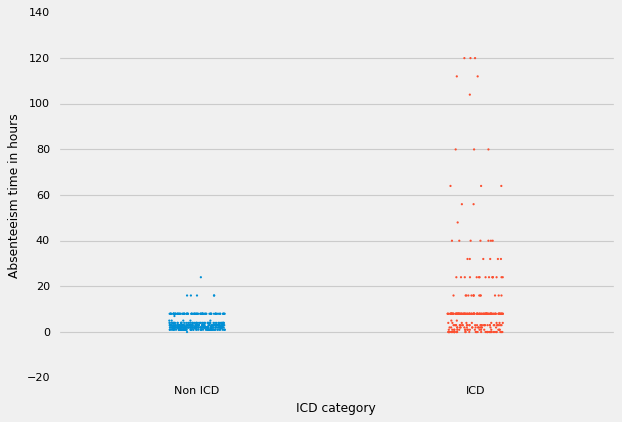

In [ ]:
sns.stripplot(x="ICD category", y="Absenteeism time in hours", data=train,size=2)

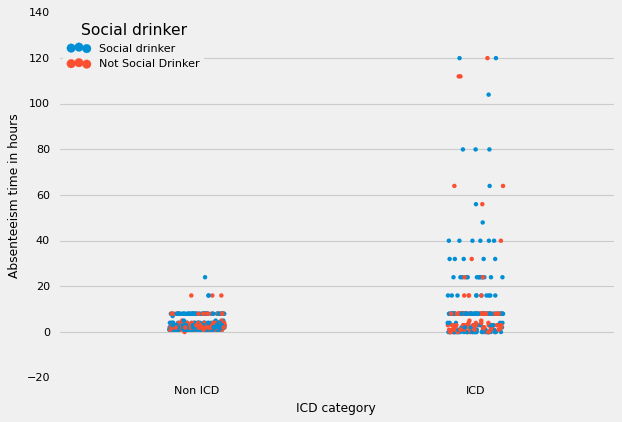

In [ ]:
sns.stripplot(x="ICD category", y="Absenteeism time in hours", data=train,size=4,hue='Social drinker')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 8.844444444444461, 'Average Absenteeism time (in hours)')

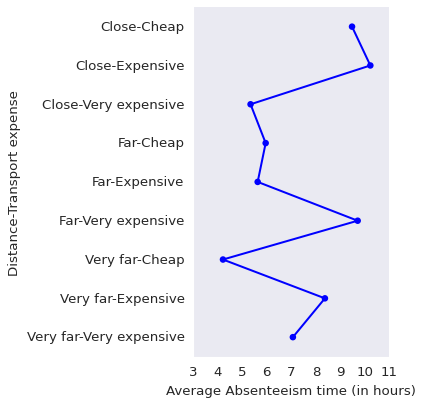

In [ ]:

plt.style.use('classic')
sns.set_style('dark')
ax = sns.factorplot(x='Absenteeism time in hours', y='Distance-Transport expense', data=tt)
plt.xlabel('Average Absenteeism time (in hours)')



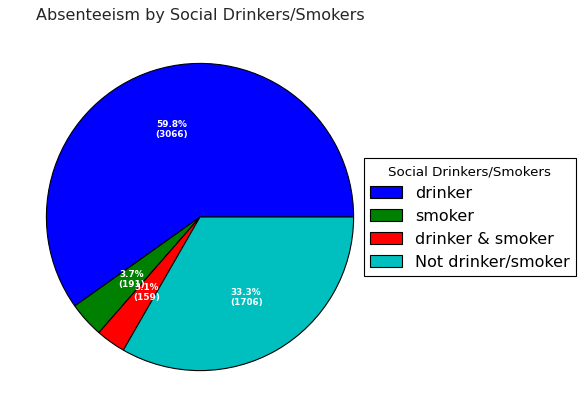

In [ ]:
df=train
drink_sum = df[(df['Social drinker'] == True) & (df['Social smoker']==False)]['Absenteeism time in hours'].sum()
smok_sum = df[(df['Social drinker'] == False) & (df['Social smoker']==True)]['Absenteeism time in hours'].sum()
drink_smok_sum = df[(df['Social drinker'] == True) & (df['Social smoker']==True)]['Absenteeism time in hours'].sum()
abs_sum = df[(df['Social drinker'] == False) & (df['Social smoker']==False)]['Absenteeism time in hours'].sum()
absen = [drink_sum, smok_sum, drink_smok_sum, abs_sum]
pie_labels = ['drinker', 'smoker', 'drinker & smoker', 'Not drinker/smoker']
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.style.use('classic')
wedges, texts, autotexts = ax.pie(absen, autopct=lambda pct: func(pct, absen), textprops=dict(color='w'))
ax.legend(wedges, pie_labels, title='Social Drinkers/Smokers', loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title('Absenteeism by Social Drinkers/Smokers')
plt.show()

In [ ]:
pip install pygooglechart

  Created wheel for pygooglechart: filename=pygooglechart-0.4.0-cp36-none-any.whl size=21996 sha256=f37a0633f2a4b9713ac407b9c375fe0f79b56c3ce199c679058dc4ef2cecdec3
  Stored in directory: /root/.cache/pip/wheels/3d/49/3a/b6b674613fefd1b8939e0bb368028230f0463455bb75d4e590
Successfully built pygooglechart


In [ ]:
from pygooglechart import PieChart3D

def python_pie3D() :
  # initialize chart object, 250 x 250 pixels
  chart = PieChart3D(360, 360)

  # pass your data to the chart object
  chart.add_data([3066,191,159,1706])

  # make labels for the slices
  chart.set_pie_labels(['Drinker','Smoker','Drinker and Smoker','Not Drinker or Smoker'])

  # render the image
  chart.download('revenue_east_europe.png')

In [ ]:
python_pie3D()

In [ ]:
train[train['Seasons']==4].shape

(195, 21)

In [ ]:

sns.set(rc={'figure.figsize':(30,30)})

plt.figure(figsize=(30,30))
plt.hist(data=df, x='Weight', bins='auto', label='Weight')
plt.xlabel('Weight')
plt.title("Weight Distribution")

In [ ]:
train_corr

ID  ...  Absenteeism time in hours
ID                               1.000000  ...                  -0.017935
Reason for absence              -0.077506  ...                  -0.296986
Month of absence                -0.000139  ...                   0.024345
Day of the week                  0.034637  ...                  -0.124361
Seasons                          0.098345  ...                  -0.005615
Transportation expense          -0.224196  ...                   0.027585
Distance from Residence to Work -0.486187  ...                  -0.088363
Service time                    -0.272636  ...                   0.019029
Age                              0.041064  ...                   0.065760
Work load Average/day            0.092562  ...                   0.024749
Hit target                       0.018875  ...                   0.026695
Disciplinary failure             0.003989  ...                  -0.124248
Education                       -0.036205  ...                  -0.046235
Son                              0.002769  ...                   0.113756
Social drinker                  -0.451250  ...                   0.065067
Social smoker                   -0.010793  ...                  -0.008936
Pet                             -0.041540  ...                  -0.028277
Weight                          -0.254156  ...                   0.015789
Height                           0.076436  ...                   0.144420
Body mass index                 -0.306883  ...                  -0.049719
Absenteeism time in hours       -0.017935  ...                   1.000000

[21 rows x 21 columns]

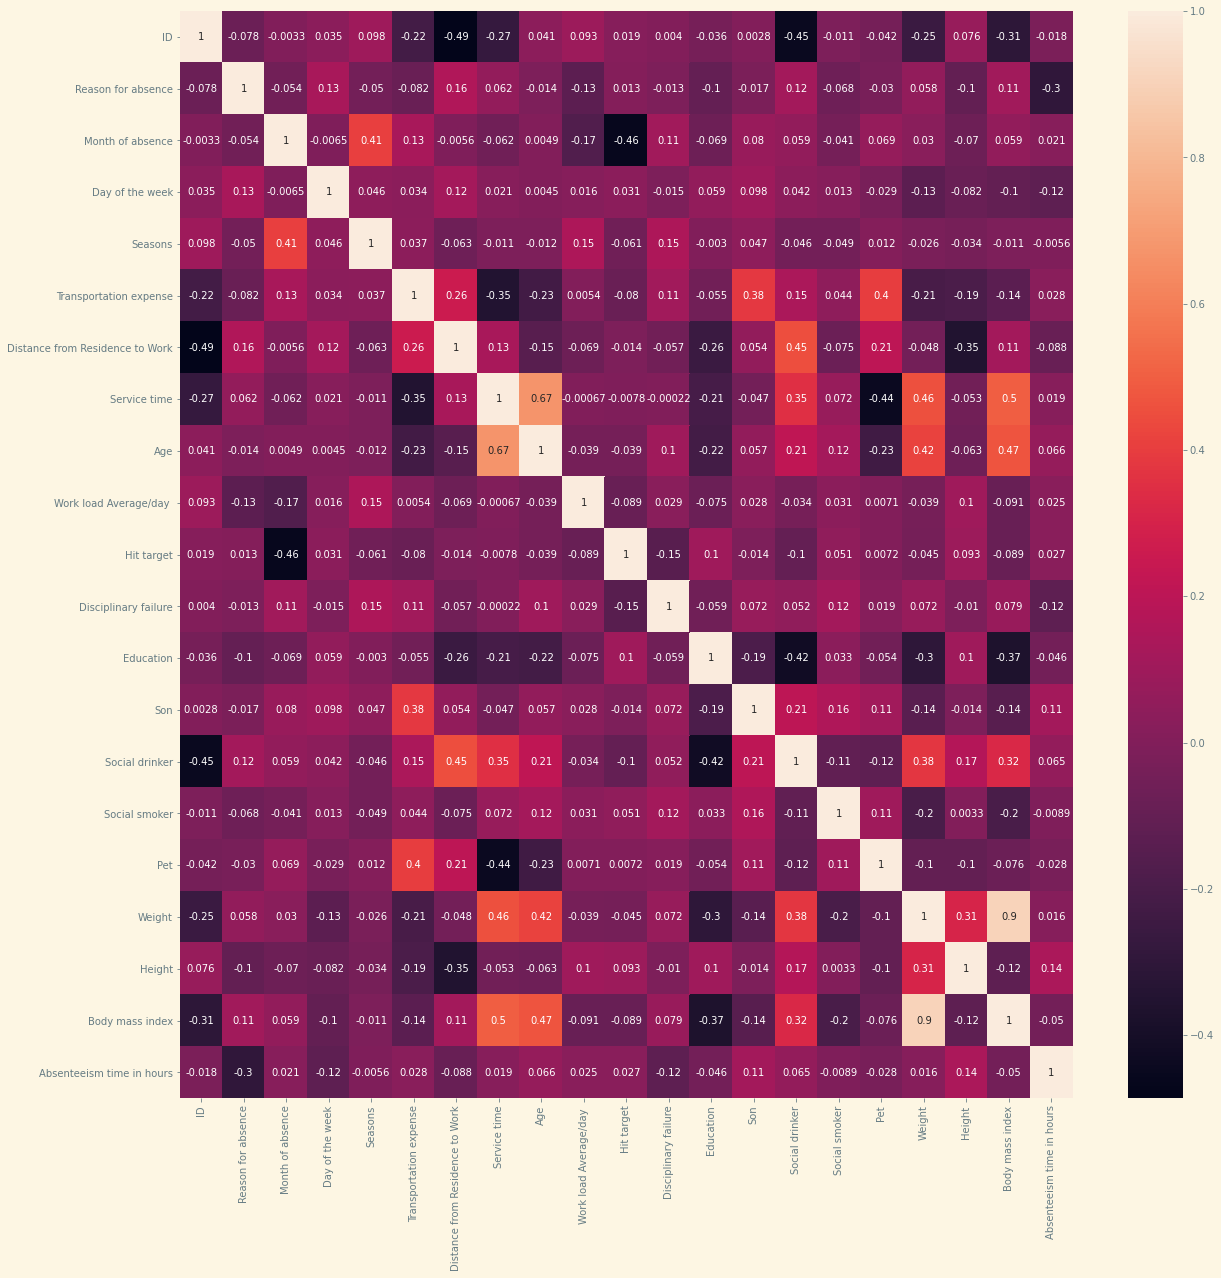

In [ ]:
plt.figure(figsize=(20, 20))

plt.style.use('Solarize_Light2')

train_corr = train.corr()
sns.heatmap(train_corr, 
            xticklabels = train_corr.columns.values,
            yticklabels = train_corr.columns.values,
            annot = True);

In [ ]:
train.rename(columns={"Work load Average/day":"work load" },inplace=True)

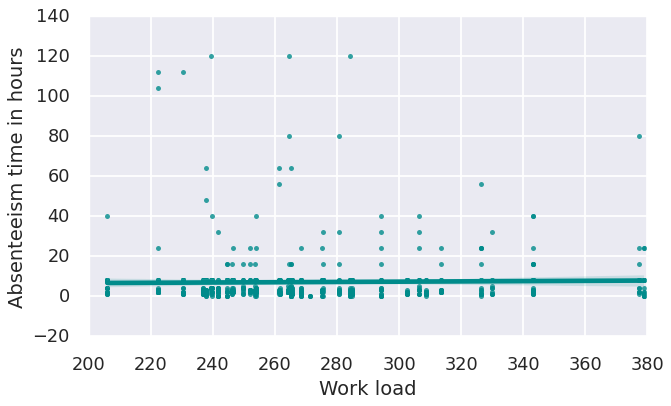

In [ ]:

plt.figure(figsize=(9,5))
sns.regplot(data=train,x='Work load',y='Absenteeism time in hours',color='darkcyan')

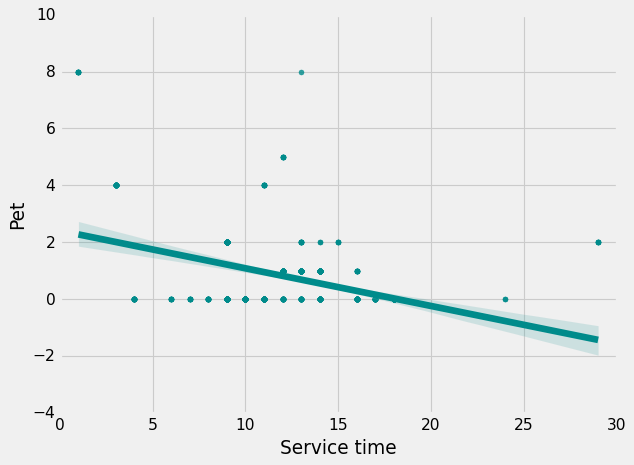

In [ ]:
sns.regplot(data=train,x='Service time',y='Pet',color='darkcyan')

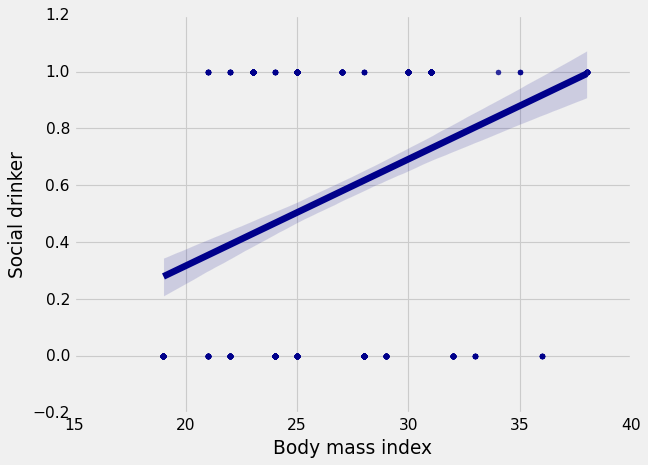

In [ ]:
sns.regplot(data=train,x='Body mass index',y='Social drinker',color='darkblue')

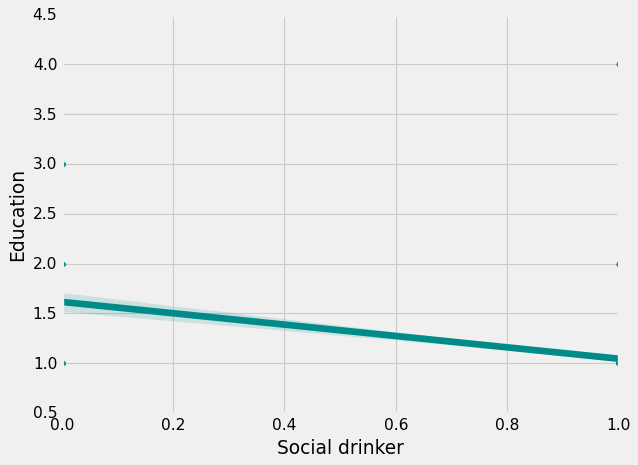

In [ ]:
sns.regplot(data=train,x='Social drinker',y='Education',color='darkcyan')

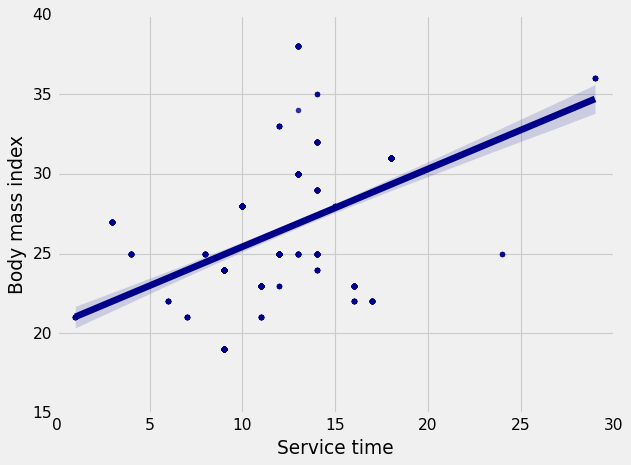

In [ ]:
sns.regplot(data=train,x='Service time',y='Body mass index',color='darkblue')


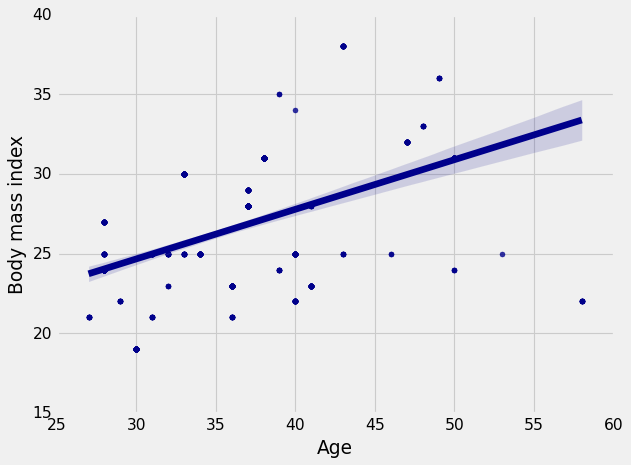

In [ ]:
sns.regplot(data=train,x='Age',y='Body mass index',color='darkblue')



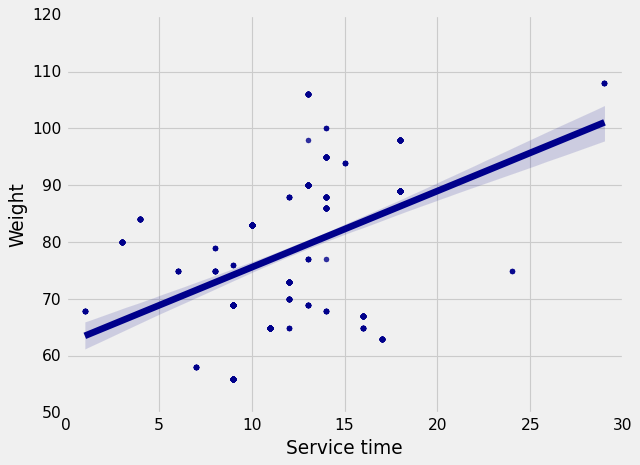

In [ ]:
sns.regplot(data=train,x='Service time',y='Weight',color='darkblue')


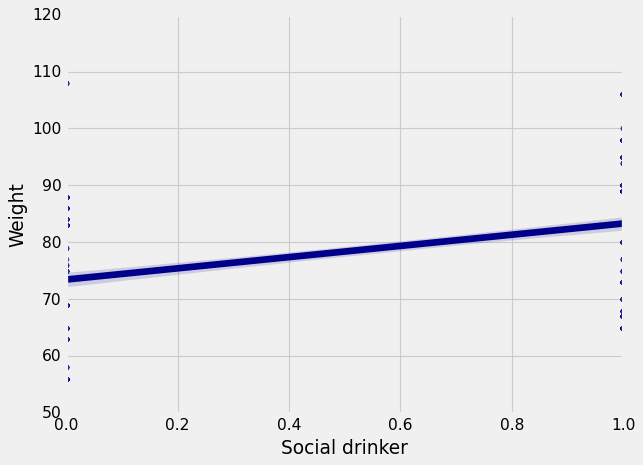

In [ ]:


sns.regplot(data=train,x='Social drinker',y='Weight',color='darkblue')

In [ ]:
train.at[737, 'Month of absence']=9
train.at[738, 'Month of absence']=3
train.at[739, 'Month of absence']=4
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


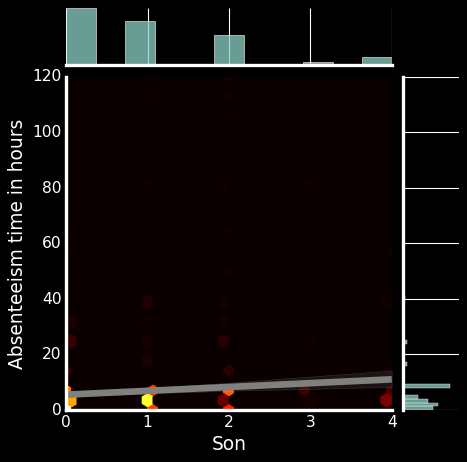

In [ ]:
g = sns.jointplot(x = 'Son', 
              y = 'Absenteeism time in hours',
              data = train, 
              kind = 'hex', 
              cmap= 'hot', 
              size=6)

#http://stackoverflow.com/questions/33288830/how-to-plot-regression-line-on-hexbins-with-seaborn
sns.regplot(train['Son'], train['Absenteeism time in hours'], ax=g.ax_joint, scatter=False, color='grey');

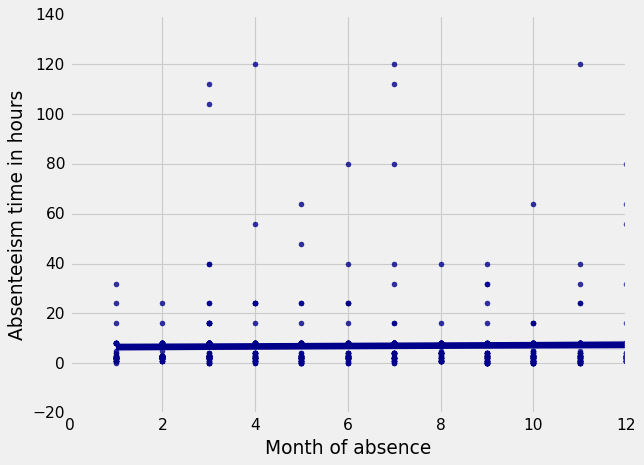

In [ ]:
sns.regplot(data=train,x='Month of absence',y='Absenteeism time in hours',color='darkblue')

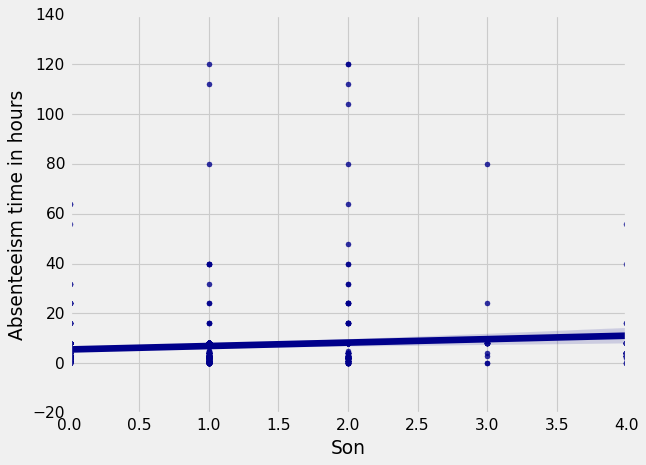

In [ ]:
sns.regplot(data=train,x='Son',y='Absenteeism time in hours',color='darkblue')

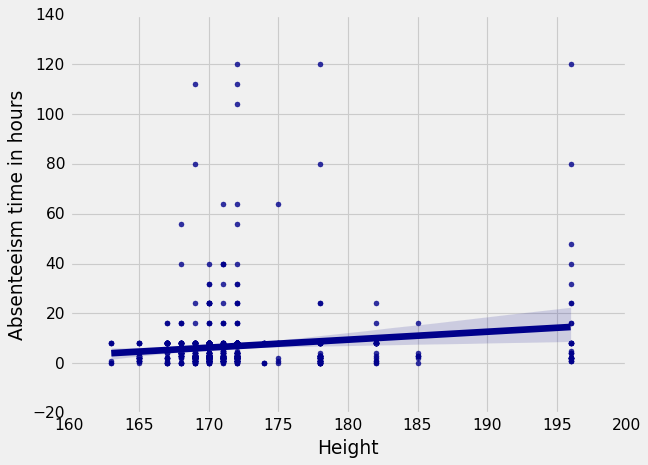

In [ ]:
sns.regplot(data=train,x='Height',y='Absenteeism time in hours',color='darkblue')

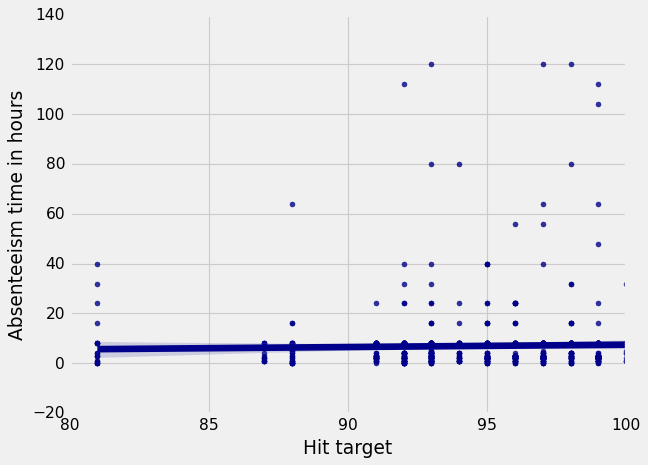

In [ ]:
sns.regplot(data=train,x='Hit target',y='Absenteeism time in hours',color='darkblue')

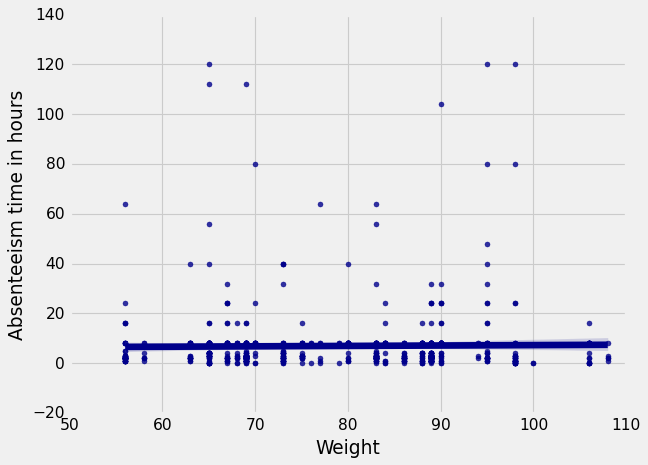

In [ ]:
sns.regplot(data=train,x='Weight',y='Absenteeism time in hours',color='darkblue')

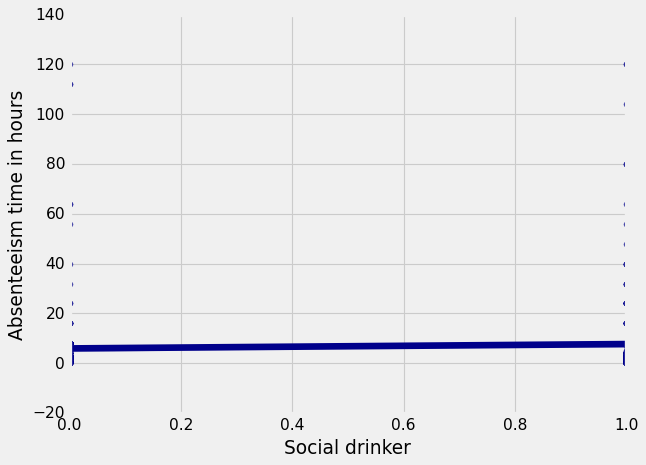

In [ ]:
sns.regplot(data=train,x='Social drinker',y='Absenteeism time in hours',color='darkblue')

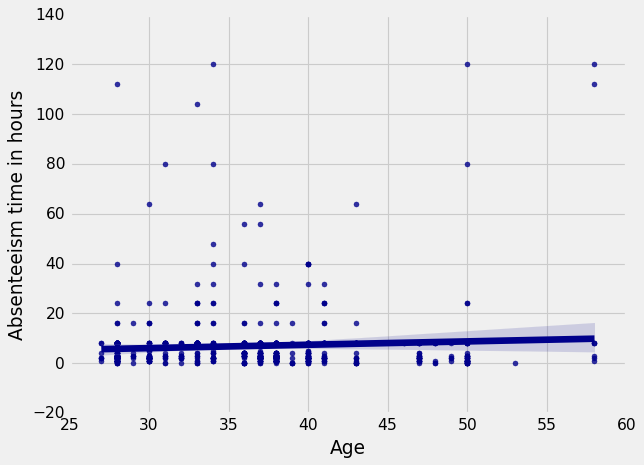

In [ ]:
sns.regplot(data=train,x='Age',y='Absenteeism time in hours',color='darkblue')

<Figure size 1008x1008 with 0 Axes>

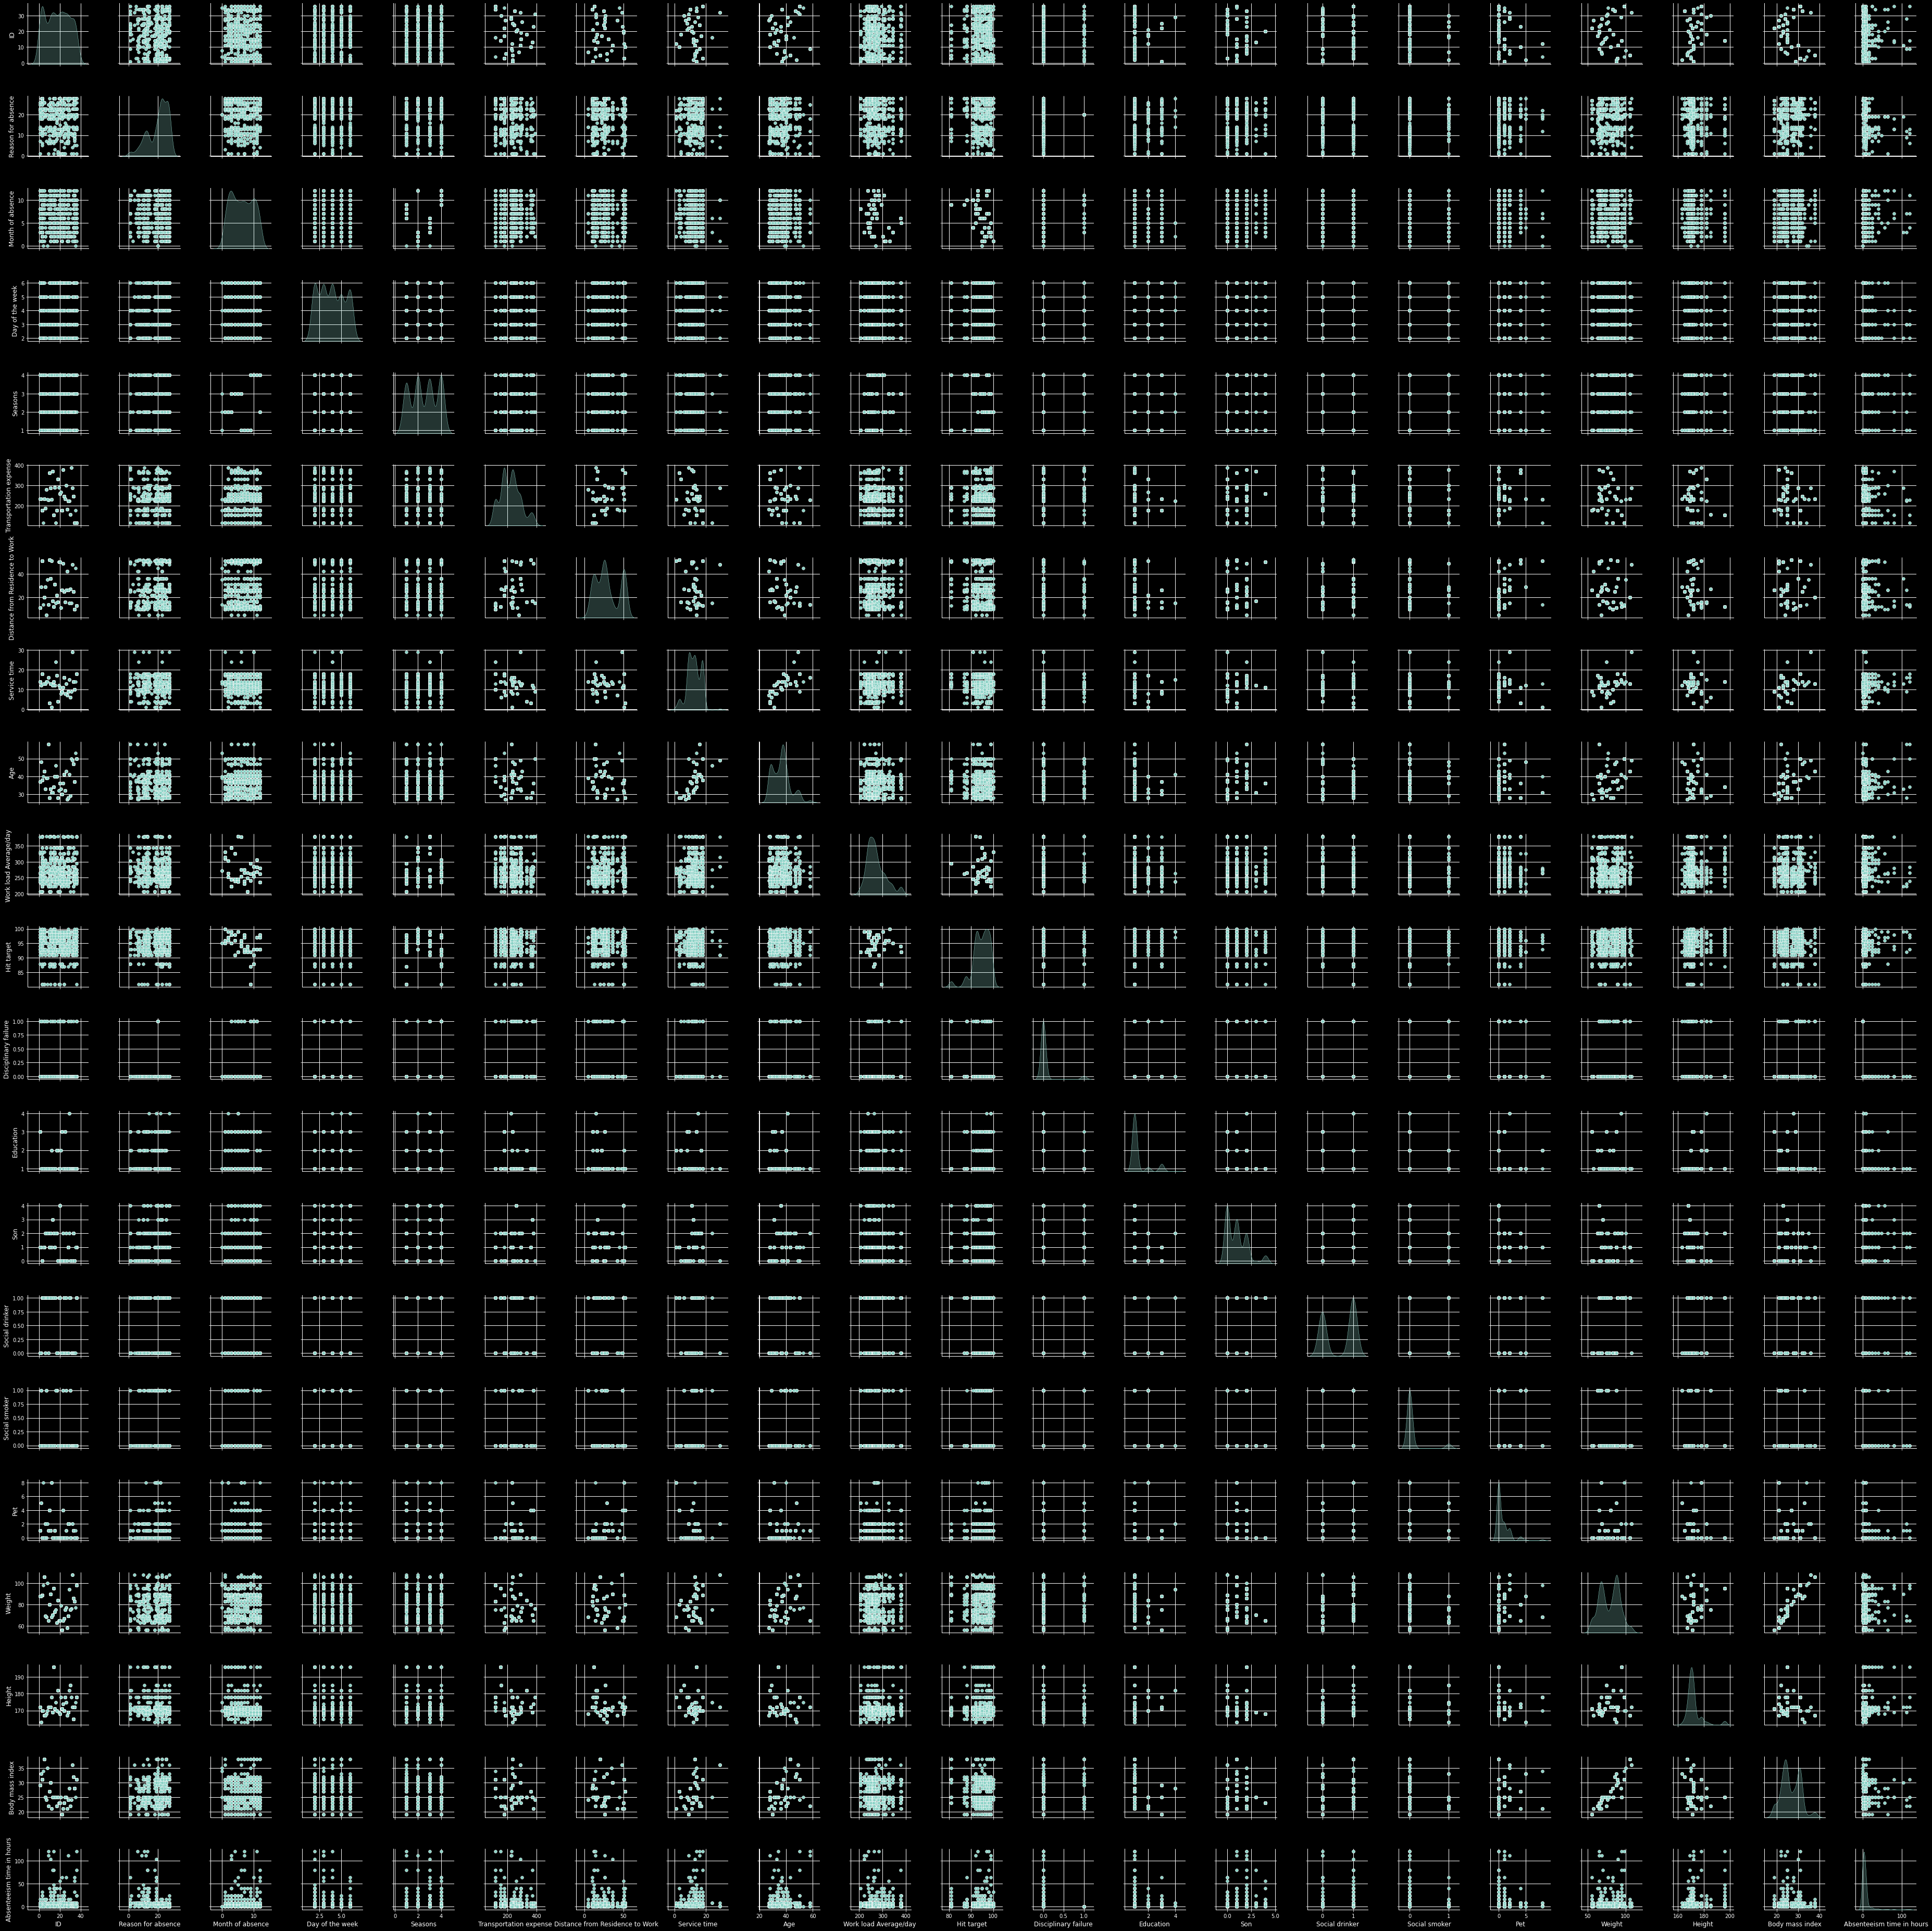

In [ ]:
plt.figure(figsize=(14, 14))

sns.pairplot(train, diag_kind='kde');

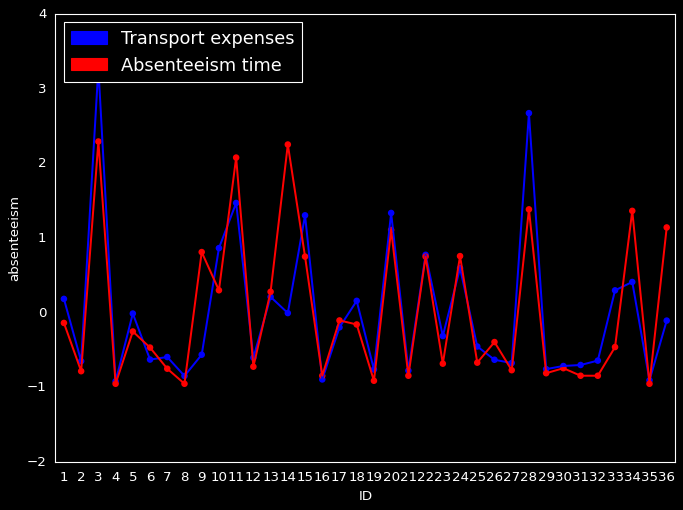

In [ ]:
#Group the entries by year, then get how many entries are there; i.e. the number of releases
temp1 = train.groupby(['ID']).count()
temp1 = temp1.reset_index()

#Do the same, but sum the values to get the total values of everything by year.
temp2 = train.groupby(['ID']).sum()
temp2 = temp2.reset_index()
plt.style.use('dark_background')

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['Transport expenses'] = temp2['Transportation expense']
normalised_df['absenteeism'] = temp2['Absenteeism time in hours']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['ID'] = temp1['ID']
import matplotlib.patches as mpatches

#Plot
plt.figure(figsize=(10, 7))
ax = sns.pointplot(x = normalised_df['ID'], y = normalised_df['Transport expenses'], color = 'blue', label='Transport expenses')
ax = sns.pointplot(x = normalised_df['ID'], y = normalised_df['absenteeism'], color = 'red', label='Absenteeism time')

blue_patch = mpatches.Patch(color='blue', label='Transport expenses')
red_patch = mpatches.Patch(color='red', label='Absenteeism time')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 16)

plt.xticks(rotation=0);

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

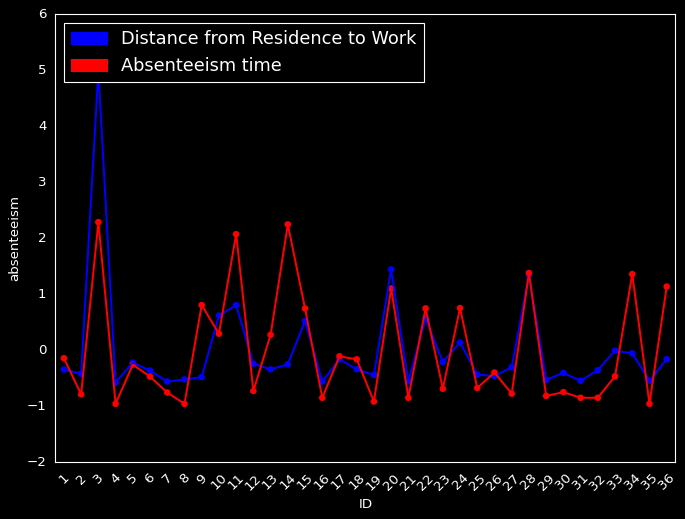

In [ ]:

normalised_df['Distance from Residence to Work'] = temp2['Distance from Residence to Work']
normalised_df['absenteeism'] = temp2['Absenteeism time in hours']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['ID'] = temp1['ID']
import matplotlib.patches as mpatches

#Plot
plt.figure(figsize=(10, 7))
ax = sns.pointplot(x = normalised_df['ID'], y = normalised_df['Distance from Residence to Work'], color = 'blue', label='Distance from Residence to Work')
ax = sns.pointplot(x = normalised_df['ID'], y = normalised_df['absenteeism'], color = 'red', label='Absenteeism time')

blue_patch = mpatches.Patch(color='blue', label='Distance from Residence to Work')
red_patch = mpatches.Patch(color='red', label='Absenteeism time')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 16)

plt.xticks(rotation=45);

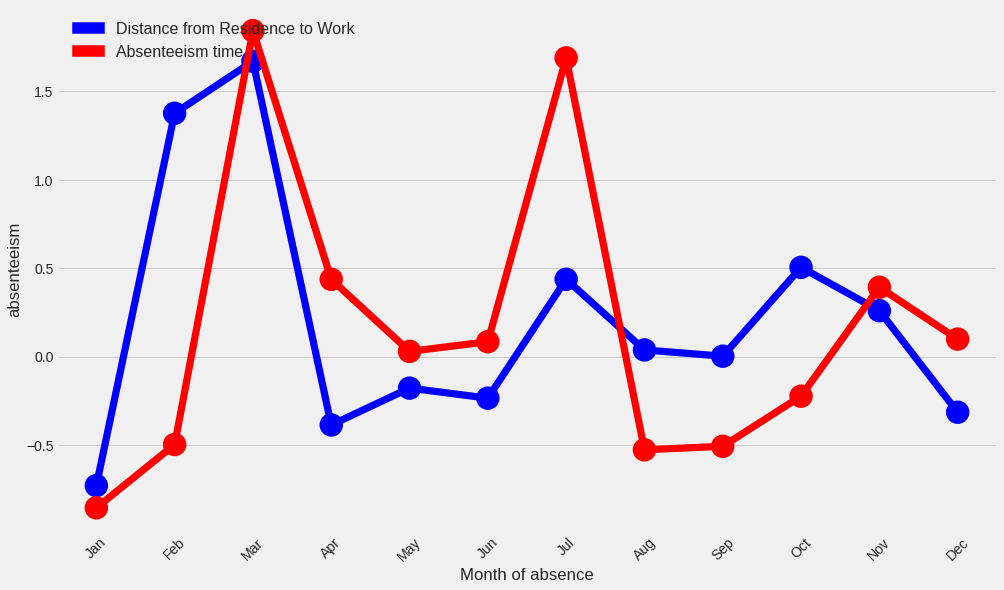

In [ ]:
#Group the entries by year, then get how many entries are there; i.e. the number of releases
temp1 = train.groupby(['Month of absence']).count()
temp1 = temp1.reset_index()

#Do the same, but sum the values to get the total values of everything by year.
temp2 = train.groupby(['Month of absence']).sum()
temp2 = temp2.reset_index()


#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()
normalised_df['Distance from Residence to Work'] = temp2['Distance from Residence to Work']
normalised_df['absenteeism'] = temp2['Absenteeism time in hours']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['Month of absence'] = temp1['Month of absence']
import matplotlib.patches as mpatches

#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df['Month of absence'], y = normalised_df['Distance from Residence to Work'], color = 'blue', label='Distance from Residence to Work',order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax = sns.pointplot(x = normalised_df['Month of absence'], y = normalised_df['absenteeism'], color = 'red', label='Absenteeism time',order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

blue_patch = mpatches.Patch(color='blue', label='Distance from Residence to Work')
red_patch = mpatches.Patch(color='red', label='Absenteeism time')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 16)

plt.xticks(rotation=45);

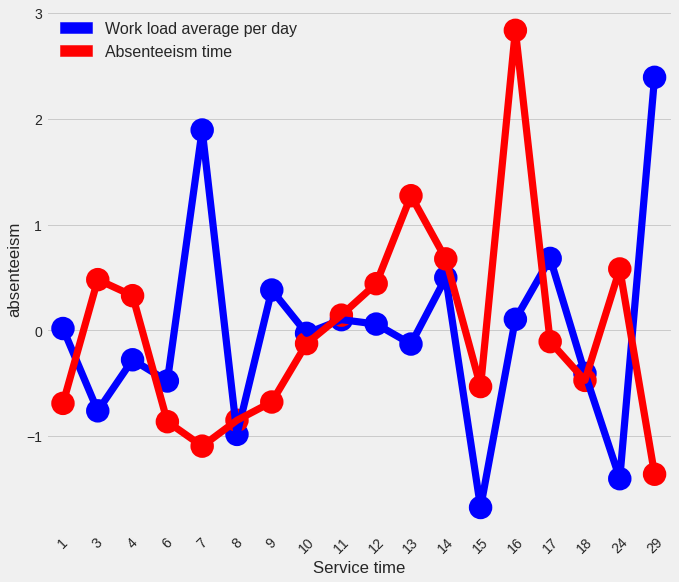

In [ ]:
temp1 = train.groupby(['Service time']).count()
temp1 = temp1.reset_index()

#Do the same, but sum the values to get the total values of everything by year.
temp2 = train.groupby(['Service time']).mean()
temp2 = temp2.reset_index()


#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()
normalised_df['Work load'] = temp2['Work load']
normalised_df['absenteeism'] = temp2['Absenteeism time in hours']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['Service time'] = temp1['Service time']
import matplotlib.patches as mpatches

#Plot
plt.figure(figsize=(10, 9))
ax = sns.pointplot(x = normalised_df['Service time'], y = normalised_df['Work load'], color = 'blue', label='Work load')
ax = sns.pointplot(x = normalised_df['Service time'], y = normalised_df['absenteeism'], color = 'red', label='Absenteeism time')

blue_patch = mpatches.Patch(color='blue', label='Work load average per day')
red_patch = mpatches.Patch(color='red', label='Absenteeism time')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 16)

plt.xticks(rotation=45);

In [ ]:
train.columns=['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'ICD category', 'Drinker-Smoker']

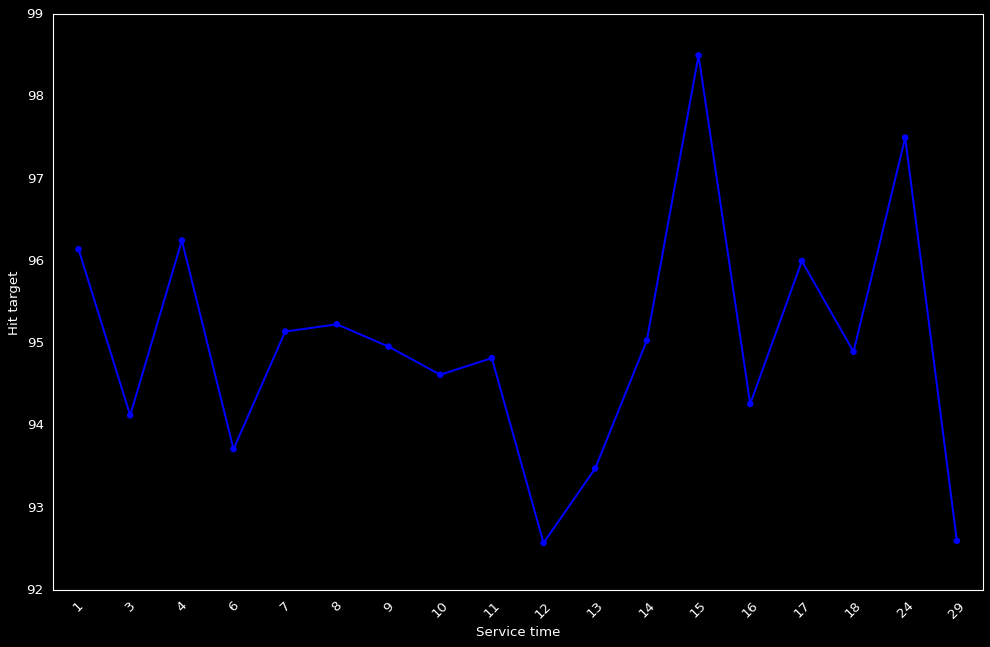

In [ ]:
temp1 = train.groupby(['Service time']).count()
temp1 = temp1.reset_index()

#Do the same, but sum the values to get the total values of everything by year.
temp2 = train.groupby(['Service time']).mean()
temp2 = temp2.reset_index()


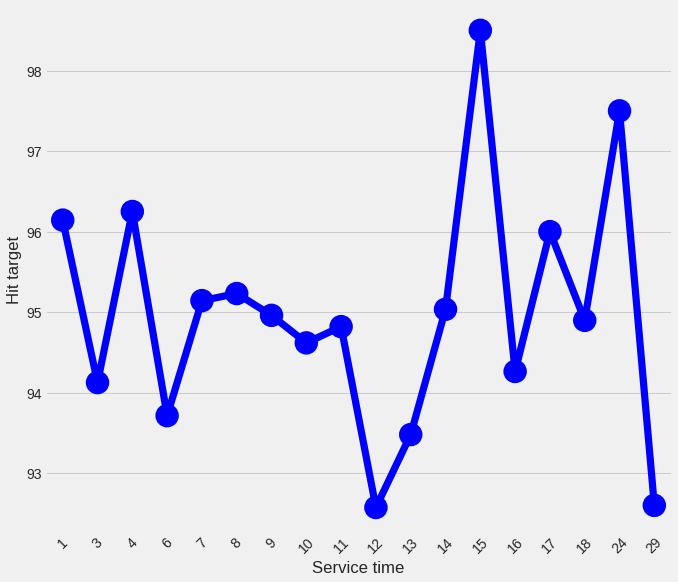

In [ ]:
plt.style.use('fivethirtyeight')

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()
normalised_df['Hit target'] = temp2['Hit target']
normalised_df['absenteeism'] = temp2['Absenteeism time in hours']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['Service time'] = temp1['Service time']
import matplotlib.patches as mpatches
normalised_df =temp2
#Plot
plt.figure(figsize=(10, 9))
ax = sns.pointplot(x = normalised_df['Service time'], y = normalised_df['Hit target'], color = 'blue', label='Hit target')





plt.xticks(rotation=45);

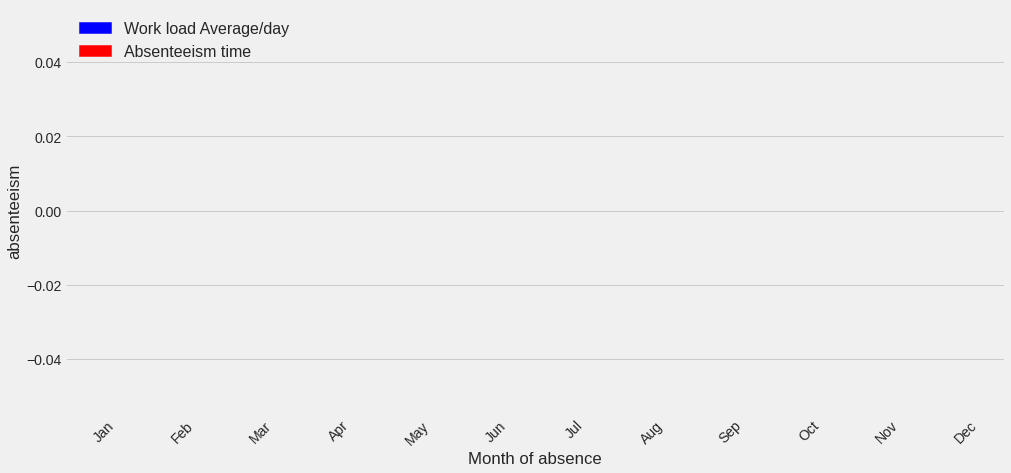

In [ ]:

normalised_df['work load'] = temp2['Work load']
normalised_df['absenteeism'] = temp2['Absenteeism time in hours']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['Month of absence'] = temp1['Month of absence']
import matplotlib.patches as mpatches

#Plot
plt.figure(figsize=(15, 7))
ax = sns.pointplot(x = normalised_df['Month of absence'], y = normalised_df['work load'], color = 'blue', label='Work load',order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax = sns.pointplot(x = normalised_df['Month of absence'], y = normalised_df['absenteeism'], color = 'red', label='Absenteeism time',order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

blue_patch = mpatches.Patch(color='blue', label='Work load Average/day')
red_patch = mpatches.Patch(color='red', label='Absenteeism time')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 16)

plt.xticks(rotation=45);

In [ ]:

normalised_df['work load'] = temp2['Work load']
normalised_df['absenteeism'] = temp2['Absenteeism time in hours']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['Month of absence'] = temp1['Month of absence']
import matplotlib.patches as mpatches

#Plot
plt.figure(figsize=(10, 7))
ax = sns.pointplot(x = normalised_df['Month of absence'], y = normalised_df['work load'], color = 'blue', label='Work load')
ax = sns.pointplot(x = normalised_df['Month of absence'], y = normalised_df['absenteeism'], color = 'red', label='Absenteeism time')

blue_patch = mpatches.Patch(color='blue', label='Work load Average/day')
red_patch = mpatches.Patch(color='red', label='Absenteeism time')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 16)

plt.xticks(rotation=45);

In [ ]:
temp2.columns=['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours']

In [ ]:
train.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'ICD category', 'Drinker-Smoker',
       'Transportation_cost'],
      dtype='object')

In [ ]:
tc=[]
for cost in list(train['Transportation expense'].values):
    if cost<=200:
        tc.append('Cheap')
    elif 200<cost<=300:
        tc.append('Expensive')
    else:
        tc.append('Very expensive')
train['Transportation_cost']=tc


In [ ]:
train.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Drinker-Smoker', 'BMI_CAT',
       'Distance_category', 'Age_cat', 'chil_cat', 'Transportation_cost',
       'ICD category'],
      dtype='object')

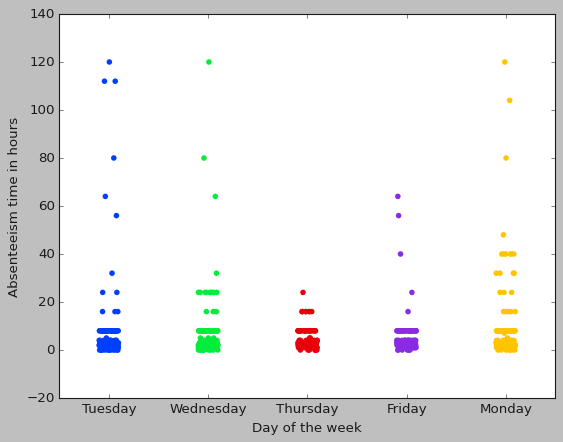

In [ ]:
plt.style.use('seaborn-bright')
sns.stripplot(data=train,x='Day of the week',y='Absenteeism time in hours')


Text(0, 0.5, 'Total Absenteeism hours')

<Figure size 1296x720 with 0 Axes>

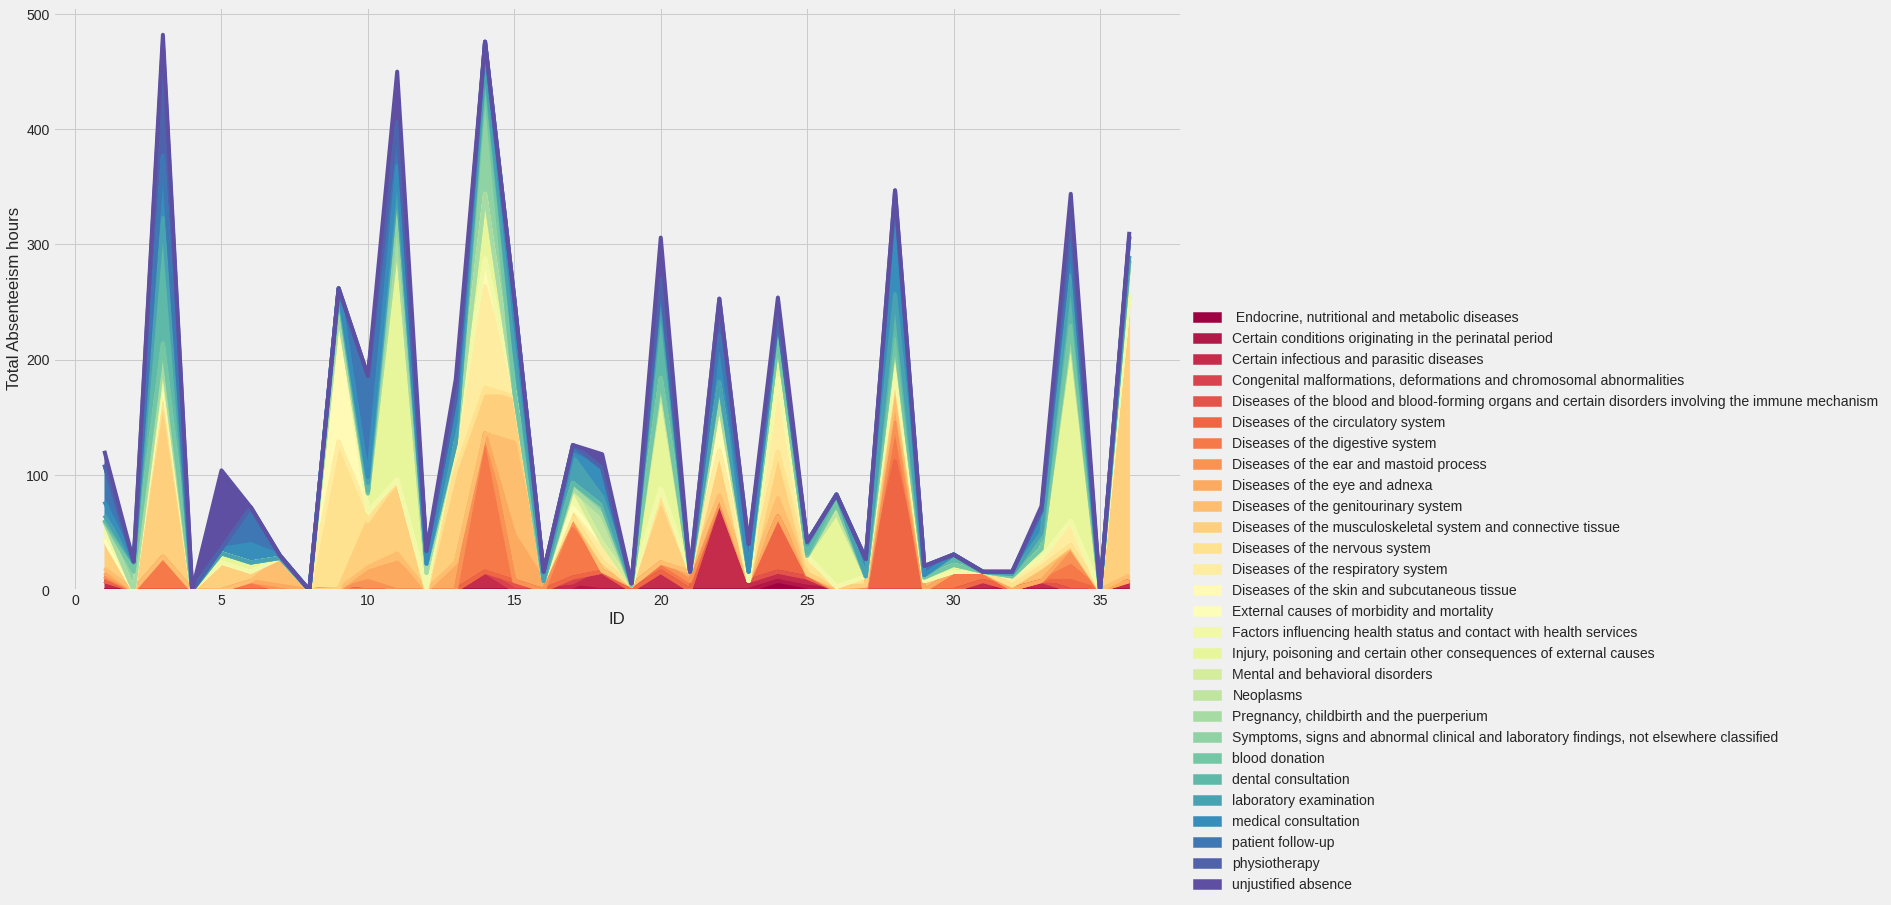

In [ ]:
fig = plt.figure(figsize=(18, 10))

plt.style.use('seaborn-bright')
yearlySales = train.groupby(['ID', 'Reason for absence'])['Absenteeism time in hours'].sum()
yearlySales.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', figsize=(18, 10) ) ;
plt.legend(bbox_to_anchor=(1, 0., 0.5, 0.5),loc='best',ncol=1)
plt.ylabel('Total Absenteeism hours')


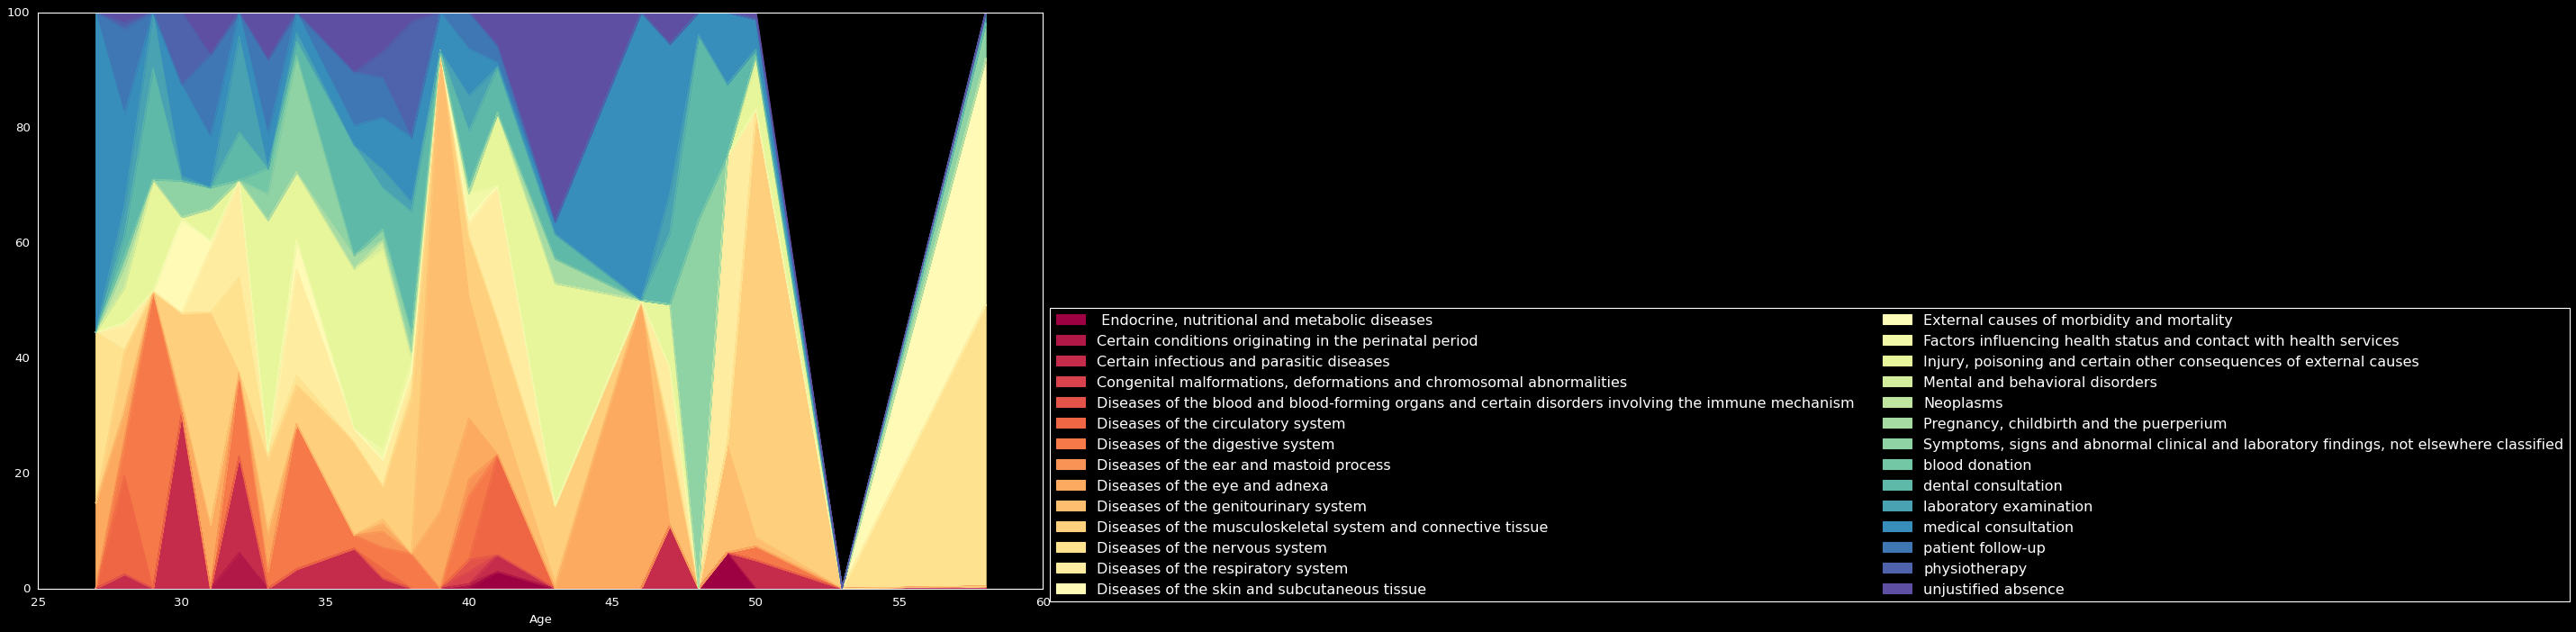

In [ ]:

genre_sales_percentages_by_season = (train.groupby(['Age', 'Reason for absence'])['Absenteeism time in hours'].sum())*(100)/train.groupby(['Age'])['Absenteeism time in hours'].sum()
genre_sales_percentages_by_season.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', grid=False, figsize=(18,10))
plt.legend(bbox_to_anchor=(1, 0., 0.5, 0.5),loc='best',ncol=2)

In [ ]:
train.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

do for time related fields


Text(0, 0.5, 'Total Absenteeism hours')

<Figure size 1440x800 with 0 Axes>

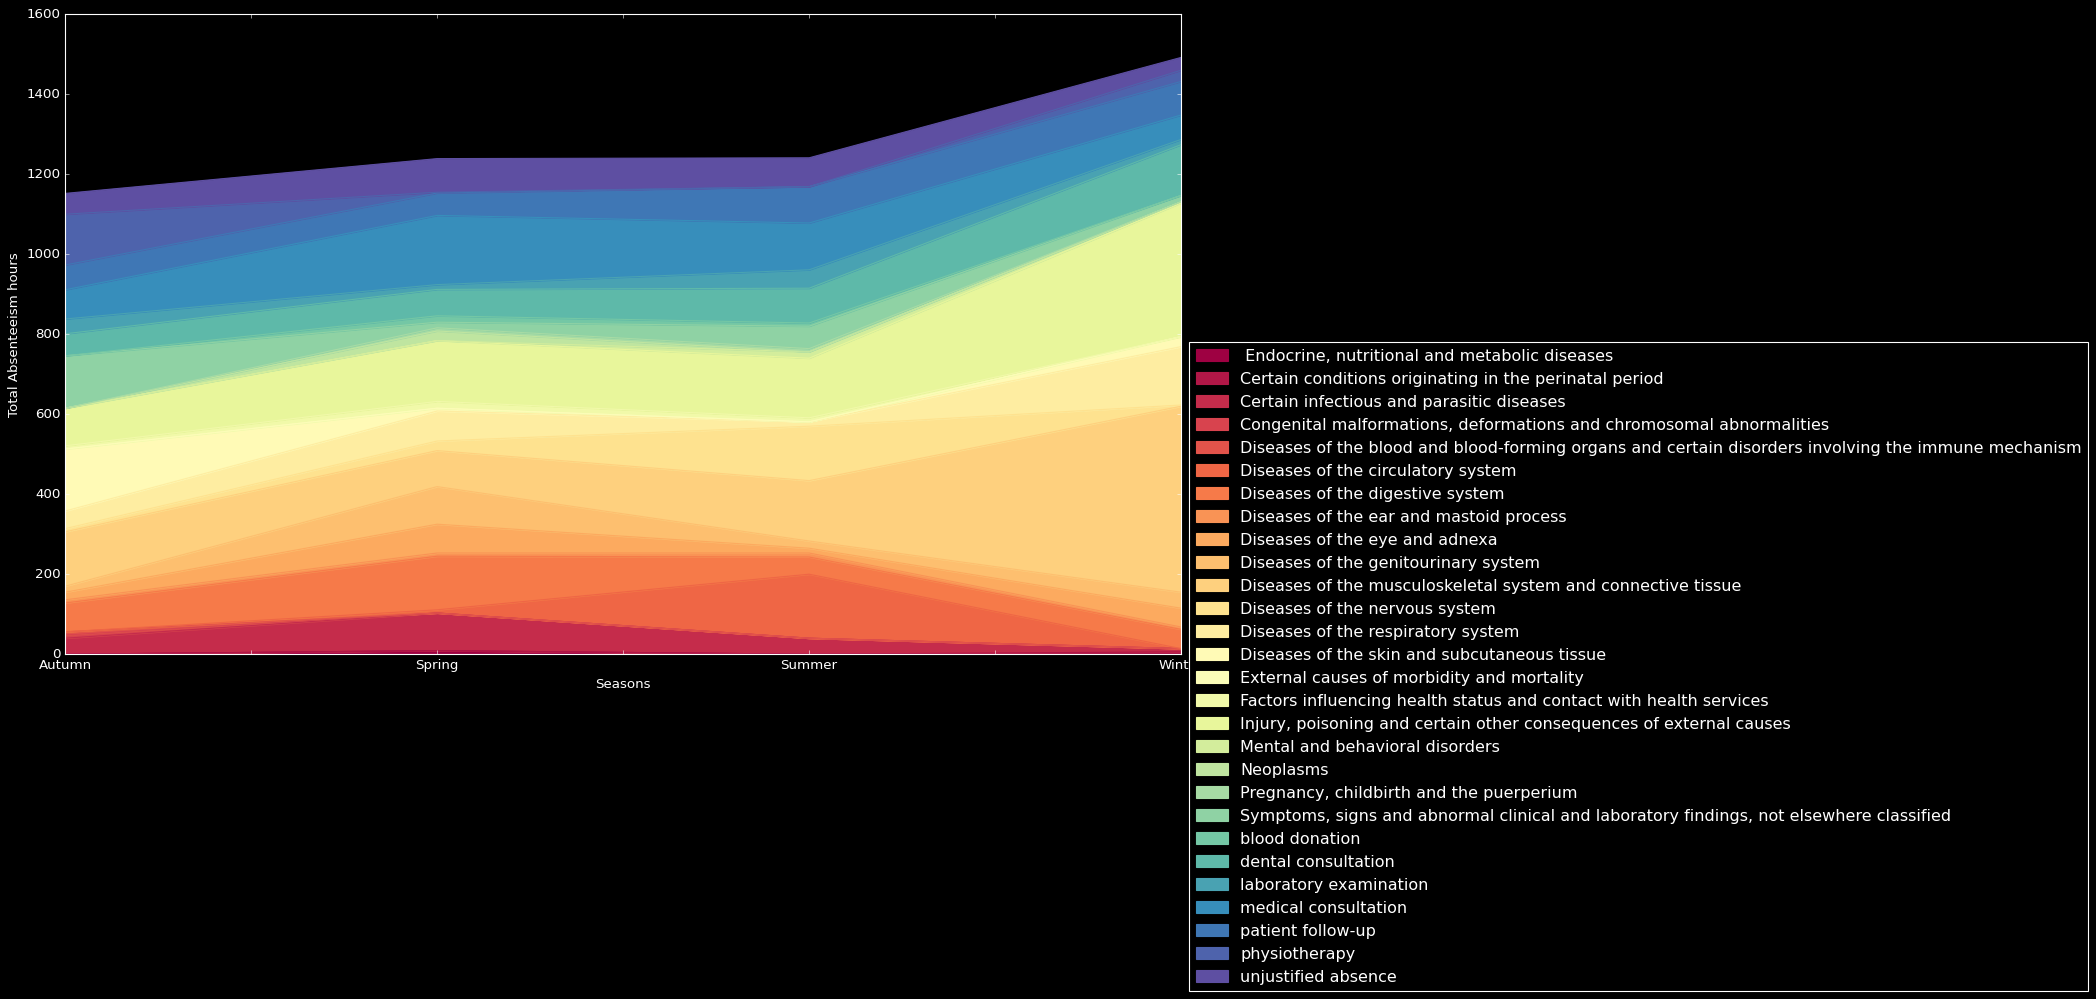

In [ ]:
fig = plt.figure(figsize=(18, 10))

plt.style.use('dark_background')
yearlySales = train.groupby(['Seasons', 'Reason for absence'])['Absenteeism time in hours'].sum()
yearlySales.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', figsize=(18, 10) ) ;
plt.legend(bbox_to_anchor=(1, 0., 0.5, 0.5),loc='best',ncol=1)
plt.ylabel('Total Absenteeism hours')


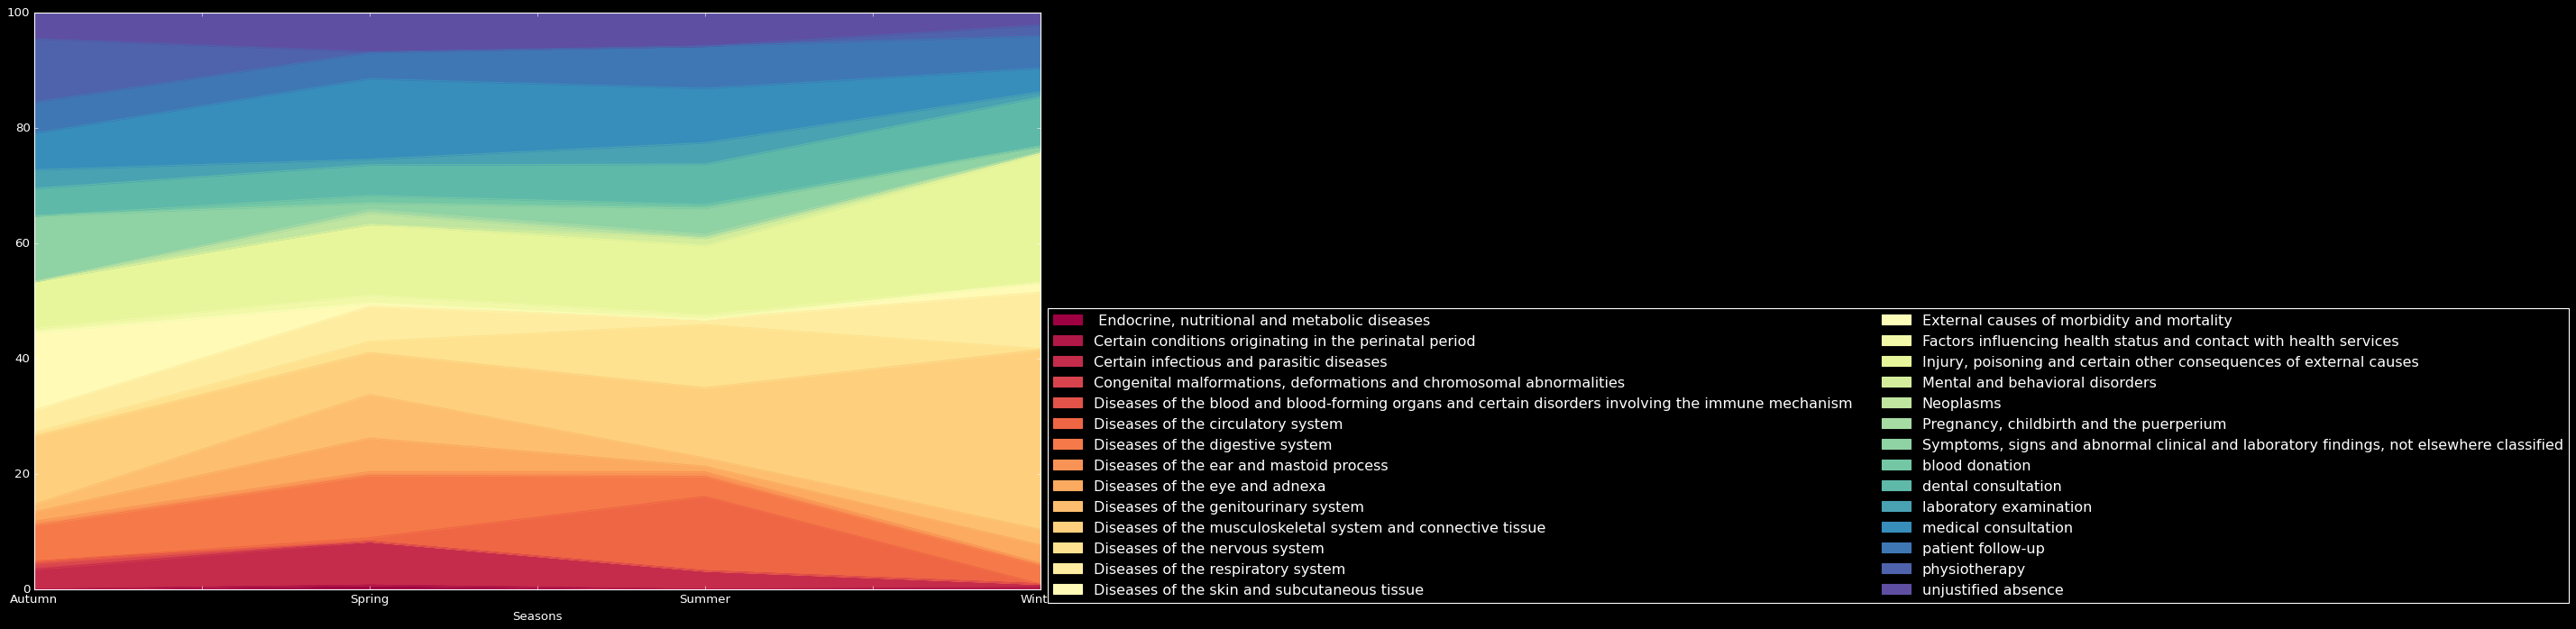

In [ ]:

genre_sales_percentages_by_season = (train.groupby(['Seasons', 'Reason for absence'])['Absenteeism time in hours'].sum())*(100)/train.groupby(['Seasons'])['Absenteeism time in hours'].sum()
genre_sales_percentages_by_season.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', grid=False, figsize=(18,10))
plt.legend(bbox_to_anchor=(1, 0., 0.5, 0.5),loc='best',ncol=2)

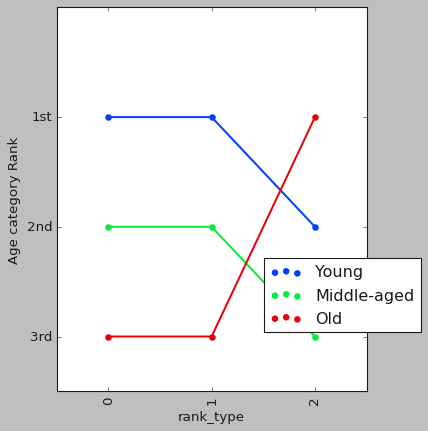

In [ ]:
 #First is the number of releases per genre, second is the sales per genre, third is the average sales per game per genre
genre_difference_metric = [train['Age_cat'].value_counts().index,train.groupby(['Age_cat']).sum()['Absenteeism time in hours'].sort_values(ascending=False).index,train.groupby(['Age_cat']).mean()['Absenteeism time in hours'].sort_values(ascending=False).index]

#Dataframe to be used for plotting.
genre_evolution_df = pd.DataFrame(columns=['genre', 'rank_type', 'rank'])

#Populate the dataframe
for metric in range(3):
    for genre in range(len(genre_difference_metric[metric])):
        genre_evolution_df = genre_evolution_df.append({'genre':genre_difference_metric[metric][genre], 'rank_type': metric, 'rank':genre},
                                   ignore_index=True)
plt.style.use('seaborn-bright')       
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)

    

ax.set_xlim([-2,4])
xs = [0.0, 1.0, 2.0]
x_labels = ['total instances per season', 'total absenteeism hours', 'average absenteeism hours']
plt.xticks(xs, x_labels, rotation='vertical')
sns.pointplot(x=genre_evolution_df.rank_type,
              y=3-genre_evolution_df['rank'], 
              hue=genre_evolution_df.genre)
ys = range(1,5)
y_labels = ['3rd', '2nd', '1st']
plt.yticks(ys, y_labels)
ax.set_ylabel('Age category Rank')

plt.legend(bbox_to_anchor=(0.7, 0., 0.5, 0.5),loc='best',ncol=1)
plt.show();

In [ ]:
for i in train.columns:
  if train[i].nunique()<9:
    print(i)
    print(train[i].nunique())


Day of the week
5
Seasons
4
Disciplinary failure
2
Education
4
Son
5
Social drinker
2
Social smoker
2
Pet
6
Transportation_cost
3
Distance_category
3
Age_cat
3
chil_cat
2
ICD category
2
Drinker-Smoker
4


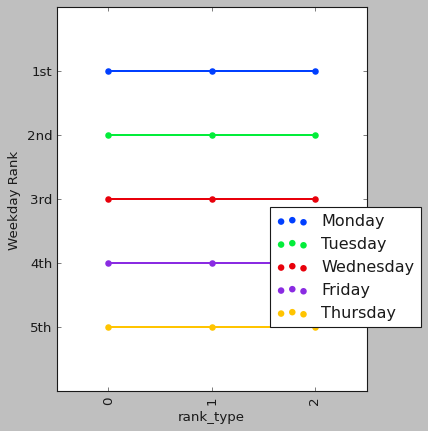

In [ ]:
#First is the number of releases per genre, second is the sales per genre, third is the average sales per game per genre
genre_difference_metric = [train['Day of the week'].value_counts().index,train.groupby(['Day of the week']).sum()['Absenteeism time in hours'].sort_values(ascending=False).index,train.groupby(['Day of the week']).mean()['Absenteeism time in hours'].sort_values(ascending=False).index]

#Dataframe to be used for plotting.
genre_evolution_df = pd.DataFrame(columns=['genre', 'rank_type', 'rank'])

#Populate the dataframe
for metric in range(3):
    for genre in range(len(genre_difference_metric[metric])):
        genre_evolution_df = genre_evolution_df.append({'genre':genre_difference_metric[metric][genre], 'rank_type': metric, 'rank':genre},
                                   ignore_index=True)

       
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)

plt.style.use('seaborn-bright')

ax.set_xlim([-2,4])
xs = range(1,4)
x_labels = ['total instances per season', 'total absenteeism hours', 'average absenteeism hours']
plt.xticks(xs, x_labels, rotation='vertical')
sns.pointplot(x=genre_evolution_df.rank_type,
              y=5-genre_evolution_df['rank'], 
              hue=genre_evolution_df.genre)
ys = range(1,6)
y_labels = ['5th','4th','3rd', '2nd', '1st']
plt.yticks(ys, y_labels)
ax.set_ylabel('Weekday Rank')

plt.legend(bbox_to_anchor=(0.7, 0., 0.5, 0.5),loc='best',ncol=1)
plt.show();

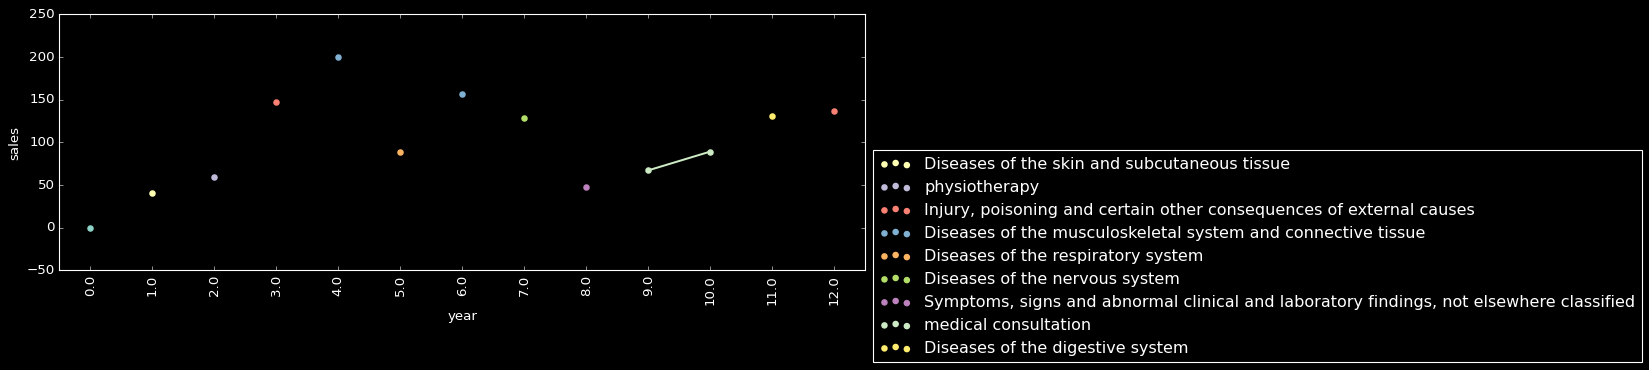

In [ ]:
temp = train.groupby(['Month of absence', 'Reason for absence']).sum().reset_index().groupby('Month of absence')

platform_yearly_winner_df = pd.DataFrame()

for year, group in temp:
    current_year = temp.get_group(year)
    this_year_max_sales = 0.0
    current_year_winner = ""
    row = {'year':"", 'winner':"", 'sales':""}
    for index, platform_data in current_year.iterrows():
        if platform_data['Absenteeism time in hours']> this_year_max_sales:
            this_year_max_sales = platform_data['Absenteeism time in hours']
            current_year_winner = platform_data['Reason for absence']
    
    row['year'] = year
    row['winner'] = current_year_winner
    row['sales'] = this_year_max_sales
    platform_yearly_winner_df = platform_yearly_winner_df.append(row, ignore_index=True)

fig = plt.figure(figsize=(13, 4))

g = sns.pointplot(x = platform_yearly_winner_df.year ,
              y = platform_yearly_winner_df.sales , 
              hue = platform_yearly_winner_df.winner);
plt.legend(bbox_to_anchor=(1, 0., 0.5, 0.5),loc='best',ncol=1)

#http://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [ ]:
train.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

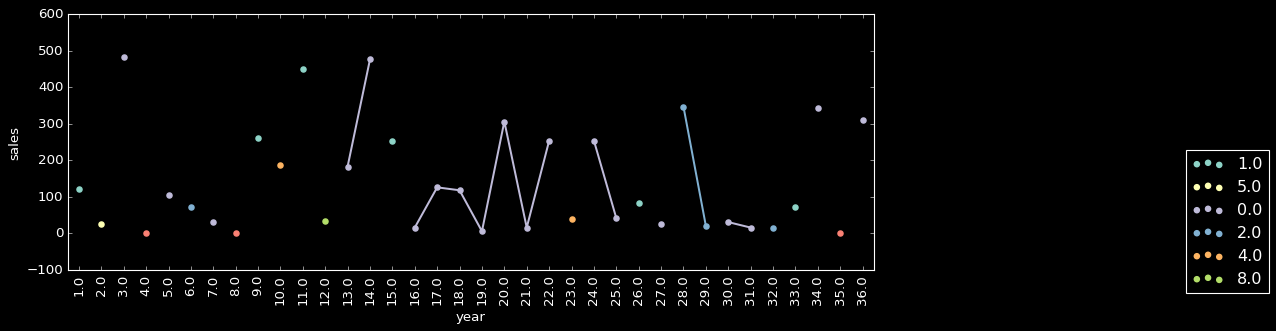

In [ ]:
temp = train.groupby(['ID', 'Pet']).sum().reset_index().groupby('ID')

platform_yearly_winner_df = pd.DataFrame()

for year, group in temp:
    current_year = temp.get_group(year)
    this_year_max_sales = 0.0
    current_year_winner = ""
    row = {'year':"", 'winner':"", 'sales':""}
    for index, platform_data in current_year.iterrows():
        if platform_data['Absenteeism time in hours']> this_year_max_sales:
            this_year_max_sales = platform_data['Absenteeism time in hours']
            current_year_winner = platform_data['Pet']
    
    row['year'] = year
    row['winner'] = current_year_winner
    row['sales'] = this_year_max_sales
    platform_yearly_winner_df = platform_yearly_winner_df.append(row, ignore_index=True)

fig = plt.figure(figsize=(13, 4))

g = sns.pointplot(x = platform_yearly_winner_df.year ,
              y = platform_yearly_winner_df.sales , 
              hue = platform_yearly_winner_df.winner);
plt.legend(bbox_to_anchor=(1, 0., 0.5, 0.5),loc='best',ncol=1)

#http://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot
g.set_xticklabels(g.get_xticklabels(), rotation=90);

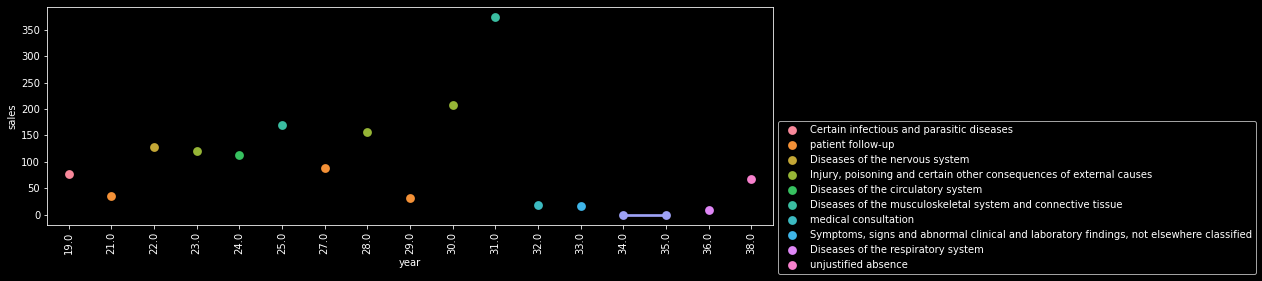

In [ ]:
temp = train.groupby(['Body mass index', 'Reason for absence']).sum().reset_index().groupby('Body mass index')
plt.style.use('dark_background')
platform_yearly_winner_df = pd.DataFrame()

for year, group in temp:
    current_year = temp.get_group(year)
    this_year_max_sales = 0.0
    current_year_winner = ""
    row = {'year':"", 'winner':"", 'sales':""}
    for index, platform_data in current_year.iterrows():
        if platform_data['Absenteeism time in hours']> this_year_max_sales:
            this_year_max_sales = platform_data['Absenteeism time in hours']
            current_year_winner = platform_data['Reason for absence']
    
    row['year'] = year
    row['winner'] = current_year_winner
    row['sales'] = this_year_max_sales
    platform_yearly_winner_df = platform_yearly_winner_df.append(row, ignore_index=True)

fig = plt.figure(figsize=(13, 4))

g = sns.pointplot(x = platform_yearly_winner_df.year ,
              y = platform_yearly_winner_df.sales , 
              hue = platform_yearly_winner_df.winner);
plt.legend(bbox_to_anchor=(1, 0., 0.5, 0.5),loc='best',ncol=1)

#http://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot
g.set_xticklabels(g.get_xticklabels(), rotation=90);

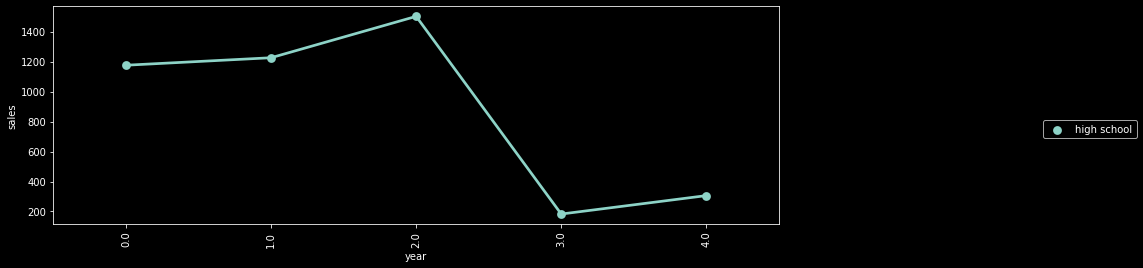

In [ ]:
temp = train.groupby(['Son', 'Education']).sum().reset_index().groupby('Son')

platform_yearly_winner_df = pd.DataFrame()

for year, group in temp:
    current_year = temp.get_group(year)
    this_year_max_sales = 0.0
    current_year_winner = ""
    row = {'year':"", 'winner':"", 'sales':""}
    for index, platform_data in current_year.iterrows():
        if platform_data['Absenteeism time in hours']> this_year_max_sales:
            this_year_max_sales = platform_data['Absenteeism time in hours']
            current_year_winner = platform_data['Education']
    
    row['year'] = year
    row['winner'] = current_year_winner
    row['sales'] = this_year_max_sales
    platform_yearly_winner_df = platform_yearly_winner_df.append(row, ignore_index=True)

fig = plt.figure(figsize=(13, 4))

g = sns.pointplot(x = platform_yearly_winner_df.year ,
              y = platform_yearly_winner_df.sales , 
              hue = platform_yearly_winner_df.winner);
plt.legend(bbox_to_anchor=(1, 0., 0.5, 0.5),loc='best',ncol=1)

#http://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot
g.set_xticklabels(g.get_xticklabels(), rotation=90);

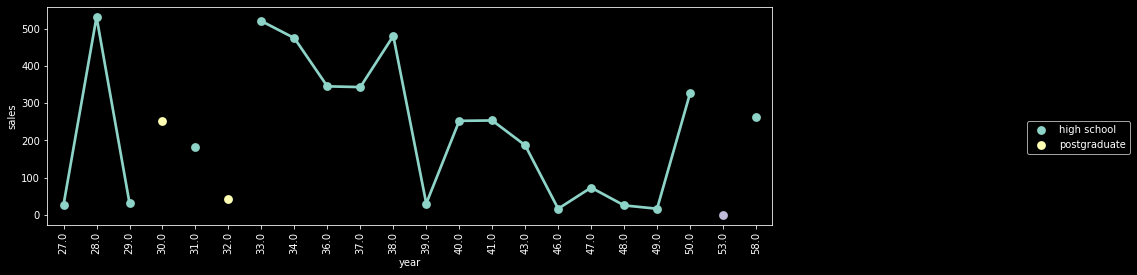

In [ ]:
temp = train.groupby(['Age', 'Education']).sum().reset_index().groupby('Age')

platform_yearly_winner_df = pd.DataFrame()

for year, group in temp:
    current_year = temp.get_group(year)
    this_year_max_sales = 0.0
    current_year_winner = ""
    row = {'year':"", 'winner':"", 'sales':""}
    for index, platform_data in current_year.iterrows():
        if platform_data['Absenteeism time in hours']> this_year_max_sales:
            this_year_max_sales = platform_data['Absenteeism time in hours']
            current_year_winner = platform_data['Education']
    
    row['year'] = year
    row['winner'] = current_year_winner
    row['sales'] = this_year_max_sales
    platform_yearly_winner_df = platform_yearly_winner_df.append(row, ignore_index=True)

fig = plt.figure(figsize=(13, 4))

g = sns.pointplot(x = platform_yearly_winner_df.year ,
              y = platform_yearly_winner_df.sales , 
              hue = platform_yearly_winner_df.winner);
plt.legend(bbox_to_anchor=(1, 0., 0.5, 0.5),loc='best',ncol=1)

#http://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot
g.set_xticklabels(g.get_xticklabels(), rotation=90);

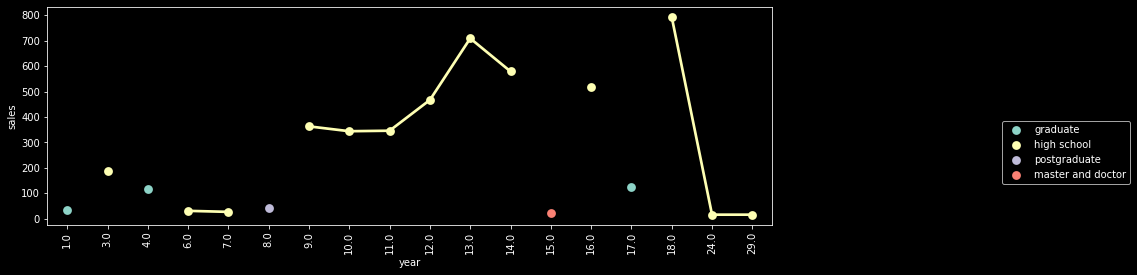

In [ ]:
l=[ 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
temp = train.groupby(['Service time', 'Education']).sum().reset_index().groupby('Service time')

platform_yearly_winner_df = pd.DataFrame()

for year, group in temp:
    current_year = temp.get_group(year)
    this_year_max_sales = 0.0
    current_year_winner = ""
    row = {'year':"", 'winner':"", 'sales':""}
    for index, platform_data in current_year.iterrows():
        if platform_data['Absenteeism time in hours']> this_year_max_sales:
            this_year_max_sales = platform_data['Absenteeism time in hours']
            current_year_winner = platform_data['Education']
    
    row['year'] = year
    row['winner'] = current_year_winner
    row['sales'] = this_year_max_sales
    platform_yearly_winner_df = platform_yearly_winner_df.append(row, ignore_index=True)

fig = plt.figure(figsize=(13, 4))

g = sns.pointplot(x = platform_yearly_winner_df.year ,
              y = platform_yearly_winner_df.sales , 
              hue = platform_yearly_winner_df.winner);
plt.legend(bbox_to_anchor=(1, 0., 0.5, 0.5),loc='best',ncol=1)

#http://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot
g.set_xticklabels(g.get_xticklabels(), rotation=90);

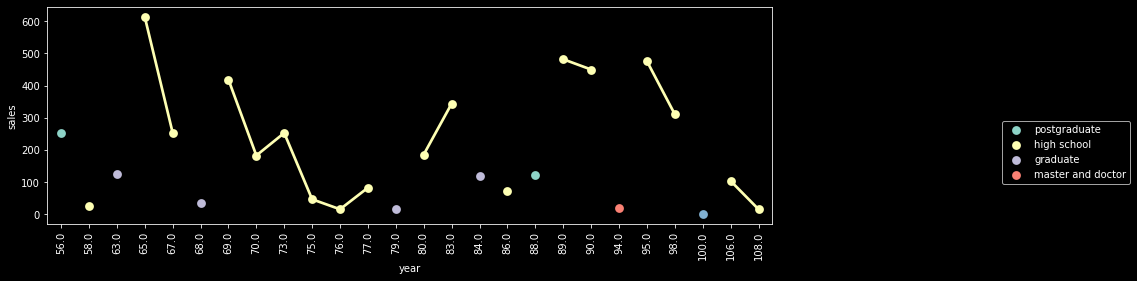

In [ ]:
temp = train.groupby(['Weight', 'Education']).sum().reset_index().groupby('Weight')

platform_yearly_winner_df = pd.DataFrame()

for year, group in temp:
    current_year = temp.get_group(year)
    this_year_max_sales = 0.0
    current_year_winner = ""
    row = {'year':"", 'winner':"", 'sales':""}
    for index, platform_data in current_year.iterrows():
        if platform_data['Absenteeism time in hours']> this_year_max_sales:
            this_year_max_sales = platform_data['Absenteeism time in hours']
            current_year_winner = platform_data['Education']
    
    row['year'] = year
    row['winner'] = current_year_winner
    row['sales'] = this_year_max_sales
    platform_yearly_winner_df = platform_yearly_winner_df.append(row, ignore_index=True)

fig = plt.figure(figsize=(13, 4))

g = sns.pointplot(x = platform_yearly_winner_df.year ,
              y = platform_yearly_winner_df.sales , 
              hue = platform_yearly_winner_df.winner);
plt.legend(bbox_to_anchor=(1, 0., 0.5, 0.5),loc='best',ncol=1)

#http://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot
g.set_xticklabels(g.get_xticklabels(), rotation=90);

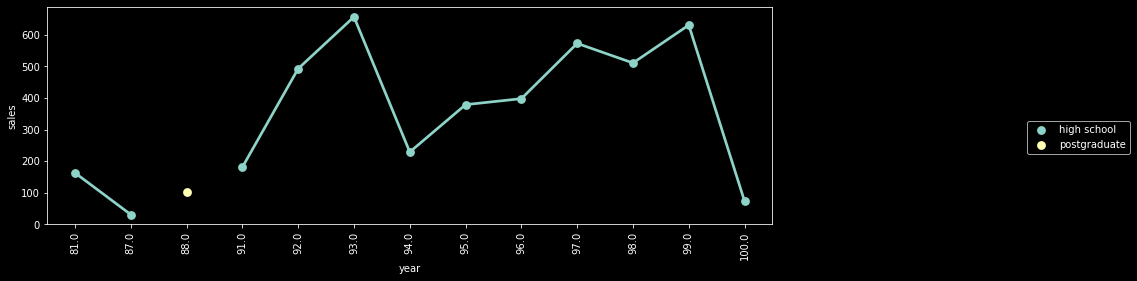

In [ ]:
temp = train.groupby(['Hit target', 'Education']).sum().reset_index().groupby('Hit target')

platform_yearly_winner_df = pd.DataFrame()

for year, group in temp:
    current_year = temp.get_group(year)
    this_year_max_sales = 0.0
    current_year_winner = ""
    row = {'year':"", 'winner':"", 'sales':""}
    for index, platform_data in current_year.iterrows():
        if platform_data['Absenteeism time in hours']> this_year_max_sales:
            this_year_max_sales = platform_data['Absenteeism time in hours']
            current_year_winner = platform_data['Education']
    
    row['year'] = year
    row['winner'] = current_year_winner
    row['sales'] = this_year_max_sales
    platform_yearly_winner_df = platform_yearly_winner_df.append(row, ignore_index=True)

fig = plt.figure(figsize=(13, 4))

g = sns.pointplot(x = platform_yearly_winner_df.year ,
              y = platform_yearly_winner_df.sales , 
              hue = platform_yearly_winner_df.winner);
plt.legend(bbox_to_anchor=(1, 0., 0.5, 0.5),loc='best',ncol=1)

#http://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [ ]:
train['Hit target'].unique()

array([ 97,  92,  93,  95,  99,  96,  94,  98,  81,  88, 100,  87,  91])

In [ ]:
train[train['Month of absence']==0]

ID  ...                        Drinker-Smoker
737   4  ...      Not Social Smoker-Social drinker
738   8  ...      Not Social Smoker-Social drinker
739  35  ...  Not Social Smoker-Not Social Drinker

[3 rows x 23 columns]

In [ ]:
train.columns=['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'ICD category', 'Drinker-Smoker']

ValueError: ignored

In [ ]:
for i in (train['Seasons'].unique()):
  t=train[train['Seasons']==i]
  print(i)
  print( t['Month of absence'].unique())

Summer
['Jul' 'Aug' 'Sep' 'Jun' 0]
Spring
['Sep' 'Oct' 'Nov' 'Dec']
Autumn
['Dec' 'Jan' 'Feb' 'Mar' 0]
Winter
['Mar' 'Apr' 'May' 'Jun' 0]


In [ ]:
for i in (train['Month of absence'].unique()):
  t=train[train['Month of absence']==i]
  print(i)
  print(pd.Series(np.array(t['Work load'].unique())).me())

Jul
252.44
Aug
240.443
Sep
265.8163333333333
Oct
267.77833333333336
Nov
286.29833333333335
Dec
259.49466666666666
Jan
317.3953333333333
Feb
272.884
Mar
269.9453333333334
Apr
270.71633333333335
May
287.538
Jun
302.19866666666667
0
271.219


In [ ]:
train.at[737, 'Month of absence']='Sep'
train.at[738, 'Month of absence']='Mar'
train.at[739, 'Month of absence']='Apr'

In [ ]:
train.groupby('ID').sum()

Transportation expense  ...  Absenteeism time in hours
ID                          ...                           
1                     5405  ...                        121
2                     1410  ...                         25
3                    20227  ...                        482
4                      118  ...                          0
5                     4465  ...                        104
6                     1512  ...                         72
7                     1674  ...                         30
8                      462  ...                          0
9                     1824  ...                        262
10                    8664  ...                        186
11                   11560  ...                        450
12                    1631  ...                         34
13                    5535  ...                        183
14                    4495  ...                        476
15                   10767  ...                        253
16                     236  ...                         16
17                    3580  ...                        126
18                    5280  ...                        118
19                     873  ...                          6
20                   10920  ...                        306
21                     804  ...                         16
22                    8234  ...                        253
23                    3024  ...                         40
24                    7380  ...                        254
25                    2350  ...                         42
26                    1500  ...                         83
27                    1288  ...                         27
28                   17325  ...                        347
29                     900  ...                         21
30                    1099  ...                         31
31                    1164  ...                         16
32                    1445  ...                         16
33                    5952  ...                         73
34                    6490  ...                        344
35                     179  ...                          0
36                    4012  ...                        311

[36 rows x 13 columns]

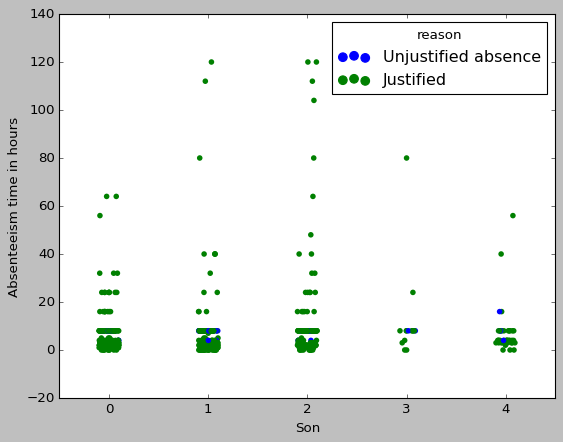

In [ ]:
sns.stripplot(data=train,x='Son',y='Absenteeism time in hours',hue='reason')